## 좀 늦었지만.. https://wikidocs.net/book/2155 에 있는 내용에 대해 정리하고 다시 공부하는 시간을 가져보고자 한다.
## 현재 konlpy는 아직 다운되지 않은 상태.


In [2]:
# pandas , numpy, matplotlib 
import pandas as pd
import numpy as np
import matplotlib as mlp
print(pd.__version__)
print(np.__version__)
print(mlp.__version__)

1.5.3
1.23.5
3.7.0


### pandas series
1차원 배열값에 대응되는 index를 부여할 수 있는 구조

In [3]:
# pandas series
# 1차원 배열값에 대응되는 index를 부여할 수 있는 구조
arr = pd.Series([500,1000,2000,4000], index = ["껌","과자",'빵','맥주'])
print(arr)
print(" ")
print(arr.index)
print(" ")
print(arr.values)
# if you want to make new series with its own index, values you can do it like this
ar1 = arr.index
ar2 = arr.values
print(type(ar1), type(ar2))
print(list(ar1) , ar2)


껌      500
과자    1000
빵     2000
맥주    4000
dtype: int64
 
Index(['껌', '과자', '빵', '맥주'], dtype='object')
 
[ 500 1000 2000 4000]
<class 'pandas.core.indexes.base.Index'> <class 'numpy.ndarray'>
['껌', '과자', '빵', '맥주'] [ 500 1000 2000 4000]


In [4]:
# if you want to put a value in a string
print(f'what the fuck {ar1[0]}') 

what the fuck 껌


### pandas DataFrame

데이터프레임은 2차원 리스트를 매개변수로 전달합니다. 2차원이므로 행방향 인덱스(index)와 열방향 인덱스(column)가 존재합니다. 다시 말해 행과 열을 가지는 자료구조입니다. 시리즈가 인덱스(index)와 값(values)으로 구성된다면, 데이터프레임은 열(columns)까지 추가되어 열(columns), 인덱스(index), 값(values)으로 구성됩니다. 이 세 개의 구성 요소로부터 데이터프레임을 생성해봅시다.

In [5]:
# pandas Dataframe
val = [[1,2,3,4], [5,6,7,8],[9,10,11,12]]
idx = ['one', 'two','three']
cols = ['alpha', 'beta','gamma','omega']
df = pd.DataFrame(val,idx,cols)
print(df)

       alpha  beta  gamma  omega
one        1     2      3      4
two        5     6      7      8
three      9    10     11     12


In [6]:
# list can be changed to dataFrame
data= [['a','b','c','d'] , ['!','@','#','$'], ['o','p','q','r']]
print(pd.DataFrame(data),"\n")
print(pd.DataFrame(data, index=['ㄱ','ㄴ','ㄷ']),"\n")
print(pd.DataFrame(data, index=['ㄱ','ㄴ','ㄷ'] , columns=['fir','sec','thr','four']))

   0  1  2  3
0  a  b  c  d
1  !  @  #  $
2  o  p  q  r 

   0  1  2  3
ㄱ  a  b  c  d
ㄴ  !  @  #  $
ㄷ  o  p  q  r 

  fir sec thr four
ㄱ   a   b   c    d
ㄴ   !   @   #    $
ㄷ   o   p   q    r


In [7]:
# dictionary를 통해 dataframe을 생성할 수 있음
dic = {
    "name" : ['john', 'amy','adelade','kate','robert'],
    "age" : [27,30,18,16,43],
    "hobby":['basketball','tennis','swimming','running','football']
}
dic_to_df = pd.DataFrame(dic)
print(dic_to_df,"\n")
# can be changed by using index like this.
dic_to_df.index=['one','two','three','four','five']
print(dic_to_df)

      name  age       hobby
0     john   27  basketball
1      amy   30      tennis
2  adelade   18    swimming
3     kate   16     running
4   robert   43    football 

          name  age       hobby
one       john   27  basketball
two        amy   30      tennis
three  adelade   18    swimming
four      kate   16     running
five    robert   43    football


### Dataframe 조회하기
* df.head(n) - 앞 부분을 n개만 보기 
* df.tail(n) - 뒷 부분을 n개만 보기
* df['열이름'] - 해당되는 열을 확인

In [8]:
print(df.head(2))
print(df.head(-2))
print(df.tail(1),'\n\n')

print(df.loc['one']) # df.loc for named row 
print(df.iloc[0]) # df.iloc for integer row

     alpha  beta  gamma  omega
one      1     2      3      4
two      5     6      7      8
     alpha  beta  gamma  omega
one      1     2      3      4
       alpha  beta  gamma  omega
three      9    10     11     12 


alpha    1
beta     2
gamma    3
omega    4
Name: one, dtype: int64
alpha    1
beta     2
gamma    3
omega    4
Name: one, dtype: int64


### 외부 데이터 읽기
Pandas는 CSV, 텍스트, Excel, SQL, HTML, JSON 등 다양한 데이터 파일을 읽고 데이터 프레임을 생성할 수 있습니다.

예를 들어 csv 파일을 읽을 때는 pandas.read_csv()를 통해 읽을 수 있습니다.

In [9]:
# 일단 to_csv로 해당 album_classification에 csv파일을 하나 만들고
# 그 다음 진행시켜보자
# df_to_csv = df.to_csv("/Users/junny/Desktop/Pytorch_Study/album_classification",sep=',',na_rep='missing value')
# 저렇게 define하는게 아니고
df.to_csv("/Users/junny/Desktop/Pytorch_Study/album_classification/df_to_csv.csv",sep=',',na_rep='missing value')



In [10]:
# csv로 만들어 주는 애는 따로 define되어서 사용하는게 아니고 그냥 저거 자체만 쓰면 알아서 쓰이는 형태
new_csv = pd.read_csv('df_to_csv.csv')
print(new_csv)

  Unnamed: 0  alpha  beta  gamma  omega
0        one      1     2      3      4
1        two      5     6      7      8
2      three      9    10     11     12


### 이제는 numpy
 Numpy의 핵심이라고 불리는 다차원 행렬 자료구조인 ndarray를 통해 벡터 및 행렬을 사용하는 선형 대수 계산에서 주로 사용됩니다. Numpy는 편의성뿐만 아니라, 속도면에서도 순수 파이썬에 비해 압도적으로 빠르다는 장점이 있습니다.

In [17]:
print(np.array([3,2,1]) , type(np.array([3,2,1])))
print(np.array([[1,2,3],[4,5,6]]), type(np.array([[1,2,3],[4,5,6]])))
print(np.array(['aa','b','c']),type(np.array(['aa','b','c'])))

[3 2 1] <class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]] <class 'numpy.ndarray'>
['aa' 'b' 'c'] <class 'numpy.ndarray'>


we can notice that 둘다 ndarray형태
Numpy 배열에는 ```축의 개수(ndim)``` 와 ``` 크기(shape)``` 라는 개념이 존재하는데, 배열의 크기를 정확히 숙지하는 것은 딥 러닝에서 매우 중요합니다. 축의 개수와 크기가 어떤 의미를 가지는지에 대해서는 머신 러닝 챕터에서 벡터와 행렬 연산을 설명할 때 언급하겠습니다.



In [19]:
# np.zeros, ones,full,eye,random ,,,
print(np.zeros((5,2)), "\n")
print(np.ones((5,2)), "\n")
print(np.full((3,5) , ['a','b','c','d','e']) , "\n")
print(np.eye(3))
print(np.random.random((5,3)),"\n")
print(np.arange(1,10),"\n")
print(np.arange(3,11,2))
print(np.array(np.arange(30)).reshape((10,3)))
# you can reshape an array to multi-dimensional ones
# 24면 2*3*4 로 해도 되고 12*2 이래도 되니까 

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]] 

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]] 

[['a' 'b' 'c' 'd' 'e']
 ['a' 'b' 'c' 'd' 'e']
 ['a' 'b' 'c' 'd' 'e']] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.687553   0.65621698 0.31990158]
 [0.26405262 0.18585764 0.78837976]
 [0.78333744 0.56195113 0.81485342]
 [0.92817566 0.15318084 0.66637712]
 [0.12897793 0.70527862 0.39805936]] 

[1 2 3 4 5 6 7 8 9] 

[3 5 7 9]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]


In [ ]:
# 참고로 np.ndarray는 잘 쓰이지 않는 기법..
# np.array는 ndarray클래스를 만들기 위한 function이고
# np.ndarray도 따로 있지만 not recommended라고 한다.

In [30]:
# Slicing 
mat = np.array([[1,2,3],[4,5,6]])
print(mat[0])
print(mat[0,:])
print(mat[:,1]) # 두번째 열 출력
print(mat)


[1 2 3]
[1 2 3]
[2 5]
[[1 2 3]
 [4 5 6]]


In [32]:
mat = np.array([[1, 2], [4, 5], [7, 8]])
print(mat)
print(mat[1][0])
print(mat[1,0])# fancy indexing
# you can make 2 specific values to a new array
new_arr = mat[[2,1],[0,0]]
# 근데 여기서 계산법이 다름.. -> 
# mat[[2행, 1행],[0열, 0열]]
# 각 행과 열의 쌍을 매칭하면 2행 0열 ((2,0)의 위치), 1행 0열 ((1,0)의 위치)의 두 개의 원소.
print(new_arr)

[[1 2]
 [4 5]
 [7 8]]
4
4
[7 4]


기존 python list 자체의 연산은 안되었지만
ndarray끼리의 연산은 가능하다.

In [38]:
x = np.array([1,2,3])
y = np.array([4,5,6])
print(x+y)
print(x+y+2) # 2를 각각의 위치마다 더해주는 꼴
print(np.add(x,y),"\n")
print(x-y)
print(np.subtract(x,y),"\n")
print(x*y)
print(np.multiply(x,y),"\n")
print(y/x)
print(np.divide(y,x),"\n")

# dot product
mat1 = np.array([[1,2],[3,4]])
mat2 = np.array([[5,6],[7,8]])
mat3 = np.dot(mat1, mat2)
print(mat3)

[5 7 9]
[ 7  9 11]
[5 7 9] 

[-3 -3 -3]
[-3 -3 -3] 

[ 4 10 18]
[ 4 10 18] 

[4.  2.5 2. ]
[4.  2.5 2. ] 

[[19 22]
 [43 50]]


### MatPlotLib(맷플롯립)
맷플롯립(Matplotlib)은 데이터를 차트(chart)나 플롯(plot)으로 ```시각화하는 패키지입니다```. 데이터 분석에서 Matplotlib은 데이터 분석 이전에 데이터 이해를 위한 시각화나, 데이터 분석 후에 결과를 ```시각화```하기 위해서 사용됩니다. 

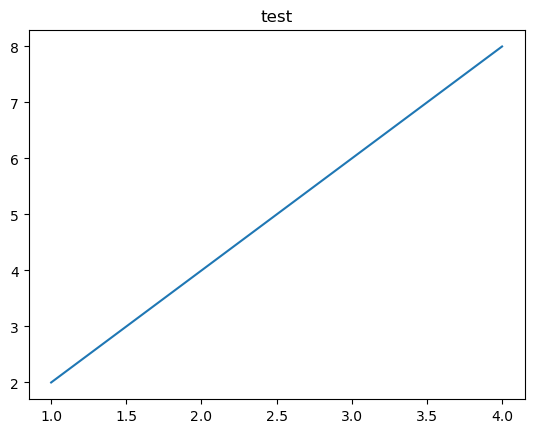

In [41]:
import matplotlib.pyplot as plt
plt.title('test')
plt.plot([1,2,3,4],[2,4,6,8])
plt.show()

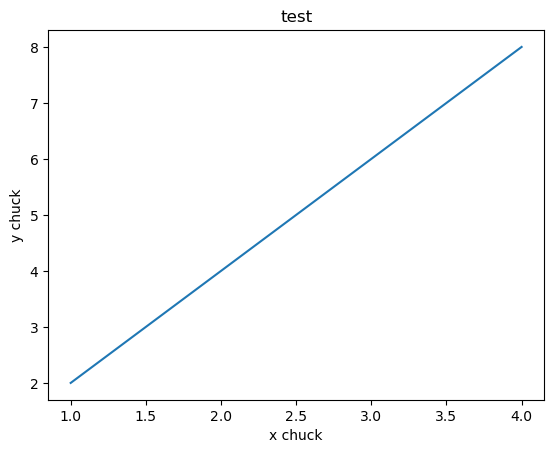

In [44]:
plt.title('test')
plt.plot([1,2,3,4],[2,4,6,8])
plt.xlabel('x chuck')
plt.ylabel('y chuck')
plt.show()

### line 추가
다수의 plot()을 하나의 그래프에 나타낼 수 있습니다. 여러개의 라인 플롯을 동시에 사용할 경우에는 각 선이 어떤 데이터를 나타내는지를 보여주기 위해 ```범례(legend)```를 사용할 수 있습니다.

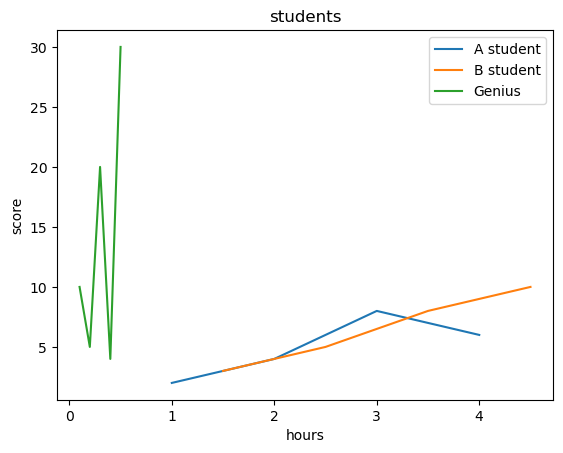

In [48]:
plt.title('students')
plt.plot([1,2,3,4],[2,4,8,6])
plt.plot([1.5,2.5,3.5,4.5],[3,5,8,10]) # 라인 새로 추가
plt.plot([0.1,0.2,0.3,0.4,0.5],[10,5,20,4,30])
plt.xlabel('hours')
plt.ylabel('score')
plt.legend(['A student', 'B student','Genius','fucker']) # 범례 삽입
plt.show()
# plot의 수와 legend의 수와 달라도 돌아가긴 하지만 표에 뜨진 않음

예전에 내가 ```numpy_pandas_re``` 라고 
공부해둔거 ipynb가 있었는데
그거를 다시 여기에 복붙해둘 예정

In [49]:
# I downloaded numpy(numerical python) in version 3.9.13 
l1 = [1,2,3,4]
arr = np.array(l1)
print(type(l1) , type(arr))
print(l1 , arr)
# numpy의 array의 type이 ndarray인 거고 실제로 define할때는 np.array 이런식으로 작성해야 한다.
print(arr.shape ) # l1(list형)은 shape가 없다. -> shape shows the size  of the array
# (4,) 이렇게 생긴건 1차원일때만,
print(len(l1) , len(arr))
ar = np.array([[[1,2,3],[4,5,6],[7,8,9]]])
print(ar.shape , ar.ndim)

<class 'list'> <class 'numpy.ndarray'>
[1, 2, 3, 4] [1 2 3 4]
(4,)
4 4
(1, 3, 3) 3


In [50]:
arr2 = np.arange(20)
print(arr2)
arr3 = np.arange(2,10)
print(arr3)
l2 = range(2,30)
print(type(l2), l2[0])
print(type(arr3)) # ndarray객체를 반환한다.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[2 3 4 5 6 7 8 9]
<class 'range'> 2
<class 'numpy.ndarray'>


In [51]:
print(np.zeros((2,3)))
print(np.zeros(((3,4,5))))
# zero들을 생성

[[0. 0. 0.]
 [0. 0. 0.]]
[[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]


In [52]:
print(np.full((3,4), 10)) # 딱 보면 알거라고 생각한다.
print(np.full(((3,4,3)), -1))

[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]
[[[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]]


In [53]:
print(np.eye(3))
print(np.eye(4))
print(np.eye(5))
# making the 단위행렬

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [54]:
print(type(np.zeros(3))) # np.zero 자체의 type
print(np.zeros(3).dtype) # ndarray의 속성값의 type

<class 'numpy.ndarray'>
float64


In [55]:
# numpy 산술연산
arr = np.array([[1,2,3],[4,5,6]])
print(arr)
print(arr*2)
print(arr*arr)
print(arr-arr)
print(arr**0.5)
print(arr*2>=arr*arr) # this also returns the Boolean value

[[1 2 3]
 [4 5 6]]
[[ 2  4  6]
 [ 8 10 12]]
[[ 1  4  9]
 [16 25 36]]
[[0 0 0]
 [0 0 0]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]
[[ True  True False]
 [False False False]]


In [56]:
# View and Copy
# numpy's array has the characteristic of 'view'
arr = np.arange(3,11)
print(arr)
arr[3] = 121
print(arr)

[ 3  4  5  6  7  8  9 10]
[  3   4   5 121   7   8   9  10]


In [57]:
# 여기서 재밌는 일이 벌어진다
ar_temp = arr[4:7]
ar_temp[0]= -37
print(ar_temp)
print(arr) # 이 결과를 보면 알겠지만 
# data는 복사되지 않고 view에 대한 변경은 그대로 원본 배열에 반영이 된다.

[-37   8   9]
[  3   4   5 121 -37   8   9  10]


In [58]:
# 단순히 slice를 하면 모든 값을 할당함
print(ar_temp)
ar_temp[:]= 111
print(ar_temp)
print(arr)

[-37   8   9]
[111 111 111]
[  3   4   5 121 111 111 111  10]


In [59]:
# copy본을 얻고 싶으면 -> .copy()를 써야한다.
ar_new_temp = arr[:-1].copy()
print(ar_new_temp)
ar_new_temp[0]=30
print(ar_new_temp)
print(arr)

[  3   4   5 121 111 111 111]
[ 30   4   5 121 111 111 111]
[  3   4   5 121 111 111 111  10]


In [60]:
arr2 = np.zeros((3,4))
arr2[0][1]=10
print(arr2)
arr2[0,2]=11 # 이렇게 해도 상관은 없음
print(arr2)

[[ 0. 10.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0. 10. 11.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


### 그니까
copy() 
-> 원본과 복사본이 ```별개```  
   즉, 서로 영향을 미치지 않음  
   즉, 복사본 배열이 데이터를 개별 소유 가능  
   즉. ``` 깊은 복사 ```  
   ex : .copy() {대신 pure python에선 .copy()해도 얕은복사}

view()
-> 원본과 복사본이 ```서로 영향```  
    즉, 서로 영향 끼침  
    즉, 복사본 배열이 데이터 개별 소유 ```불```가능  
    즉, ``` 얕은 복사 ```  
    ex : slicing, .view()

NumPy 배열 객체의 base 속성 이용.

※ copy()로 생성된 배열 (= 데이터 개별 소유 O) 경우, None 반환.

※ view()로 생성된 배열 (= 데이터 개별 소유 X) 경우, 원본 배열 반환.

In [61]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5])

x = arr.copy()

y = arr.view()

print(x.base) # None

print(y.base) # [1 2 3 4 5]

None
[1 2 3 4 5]


In [62]:
# slicing 
arr2d =np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(arr2d)
print(arr2d[:])
print(arr2d[:2])
print(arr2d[:-1])
# 다른점을 체크해보세요

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [63]:
print(arr2d[:2, 1:])
print(arr2d[:2, :-1])
print(arr2d[2, 1:])
print(arr2d[:, 1:])
print(arr2d[:, -1])
# 뭐가 어떻게 되는건지 확인해보세요

[[2 3]
 [5 6]]
[[1 2]
 [4 5]]
[8 9]
[[ 2  3]
 [ 5  6]
 [ 8  9]
 [11 12]]
[ 3  6  9 12]


In [64]:
# randnum
names = np.array(['kim','lee','park','choi','jung'])
data = np.random.randn(7,4)
print(names)
print(data)

['kim' 'lee' 'park' 'choi' 'jung']
[[-0.69494277 -0.4613996  -0.01831939  0.75588866]
 [ 0.54931593  0.90000052 -0.16409847  0.87293473]
 [ 1.32815393 -1.18467496  0.3093613  -1.16712142]
 [-0.92320635  2.31337616 -0.21679674  1.10520928]
 [-1.30814332 -0.27928814  0.58463186  0.52266399]
 [ 0.60596553 -0.96320444 -0.1512901   0.73583977]
 [-1.17578576 -0.25005459  2.19555925  0.41993458]]


In [65]:
# 일단 indexing하려는 축의 길이가 같아야함.. 그래야 위와같은 indexing error가 뜨지 않겠죠?
names=np.append(names,np.array(['moon','hwang']))
print(names)

['kim' 'lee' 'park' 'choi' 'jung' 'moon' 'hwang']


In [66]:
data[names=='jung']
# names=='jung' 인 놈중 true값만 index로 쓰임

array([[-1.30814332, -0.27928814,  0.58463186,  0.52266399]])

In [67]:
data[names=='jung', 1] # ㄴspecific하게 고를 수 있음

array([-0.27928814])

In [68]:
# not , != & | 사용 가능
data[~(names=='jung')] # 여기선 names=='jung'이 true 아니면 false로 나오는 binary니까 bitwise하게 생각해도됨
# 그래서 ~이 붙은거고
# boolean 배열에서는 and, or 같은 논리연산자(&& || !) 보다 비트연산자(& | ~)로 움직인다고 생각하자

array([[-0.69494277, -0.4613996 , -0.01831939,  0.75588866],
       [ 0.54931593,  0.90000052, -0.16409847,  0.87293473],
       [ 1.32815393, -1.18467496,  0.3093613 , -1.16712142],
       [-0.92320635,  2.31337616, -0.21679674,  1.10520928],
       [ 0.60596553, -0.96320444, -0.1512901 ,  0.73583977],
       [-1.17578576, -0.25005459,  2.19555925,  0.41993458]])

In [69]:
# Fancy Indexing
arr = np.empty((3,6))
for i in range(3):
    arr[i] = i
print(arr)

[[0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]]


In [70]:
# if you want to select specific ordered rows just 원하는 순서가 명시된 정수가 담긴 ndarray를 넘기면 된다
print(arr[[0,1]])
print(arr[[1,2]])

[[0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]]


In [71]:
# 만약 정수가 아닌 다른 애들이면?
test = np.array([['a','b','c'],['d','e','f'],['g','h','i'],['11','22','33']])
print(test[[0,2]]) # 옹 되네?
print(test[[-1,-3,0,1,1,1,1,1]]) # 신기하넹

[['a' 'b' 'c']
 ['g' 'h' 'i']]
[['11' '22' '33']
 ['d' 'e' 'f']
 ['a' 'b' 'c']
 ['d' 'e' 'f']
 ['d' 'e' 'f']
 ['d' 'e' 'f']
 ['d' 'e' 'f']
 ['d' 'e' 'f']]


In [72]:
# let's see what happens in multi indexed array
test= np.arange(45).reshape((5,3,3))
print(test)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[27 28 29]
  [30 31 32]
  [33 34 35]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]]


In [73]:
print(test[0,1]) # 이건 팬시 인덱싱이 아니지
print(test[[0,1]]) # 이래야 팬시 인덱싱
print(test[[0,2,4]])

[3 4 5]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]]


In [74]:
print(test[[0,2,3,4],[0,0,2,1],[0,0,0,0]]) # 잘 따져서 봐보셈

[ 0 18 33 39]


In [75]:
# transpose 특성 정리
A = np.arange(12).reshape(3,4)
print(A)
print(A.T)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [76]:
print(A.transpose())
print(np.transpose(A))

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [77]:
AA = np.arange(24).reshape((2,3,4))
print(AA) # 2by3by4
print(AA.shape)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
(2, 3, 4)


In [78]:
print(AA.T)# 4by 3by2
print(AA.T.shape)

[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
(4, 3, 2)


In [79]:
print(AA.transpose(1,2,0)) 
print(AA.transpose(1,2,0).shape) 
# 이렇게 하면 특정한 shape의 transpose를 구할 수 있음

[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [80]:
print(np.transpose(AA,(1,2,0))) # 이렇게 해도 상관은 없넹 

[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]


In [81]:
# Series는 array랑 비슷하다고 봐도 됨
ex = pd.Series([4,5,6,7])
print(ex)
print(type(ex))
print(ex.values)
print(type(ex.values)) # 보면 numpy의 ndarray의 형태임을 알 수 있음
print(len(ex))
print(ex.index) # series의 range라고 봐도 됨


0    4
1    5
2    6
3    7
dtype: int64
<class 'pandas.core.series.Series'>
[4 5 6 7]
<class 'numpy.ndarray'>
4
RangeIndex(start=0, stop=4, step=1)


In [82]:
# you can choose the index of its series
ex2 = pd.Series([4,3,2,1], index = ['가','나','다','라'])
print(ex2)
print(ex2.index)
print(type(ex2.index))
print(ex2.index.shape)
print(ex2.index[1])
# 결과를 보고 유추를 해보자


가    4
나    3
다    2
라    1
dtype: int64
Index(['가', '나', '다', '라'], dtype='object')
<class 'pandas.core.indexes.base.Index'>
(4,)
나


In [83]:
# you can use index for selecting values
print(ex2['가'])
print(ex2['다'])
# this kind of operation could be used in series too
print(ex2[ex2>2])
alpha = ex2[ex2>2]
print(type(alpha))
print(" ")
print(ex2*2)
print(" ")
print(np.exp(ex2)) # e^4 , e^3 .... 이런식으로?

4
2
가    4
나    3
dtype: int64
<class 'pandas.core.series.Series'>
 
가    8
나    6
다    4
라    2
dtype: int64
 
가    54.598150
나    20.085537
다     7.389056
라     2.718282
dtype: float64


In [84]:
'가' in ex2

True

In [85]:
'j' in ex2

False

In [86]:
# if dictionary is needed , you can use dict and series together
dat = {'seoul':50000 , 'daegu':20000 , 'busan':35000 , 'ulsan':28000}
se = pd.Series(dat)
print(se)

seoul    50000
daegu    20000
busan    35000
ulsan    28000
dtype: int64


In [87]:
# or you can choose an index if you want
cities= ['seoul', 'daejeon', 'daegu', 'incheon']
se2 = pd.Series(dat, index = cities)
print(se2) # index와 맞지않는 value는 NaN

seoul      50000.0
daejeon        NaN
daegu      20000.0
incheon        NaN
dtype: float64


In [88]:
# isnull, not null 같은 애들도 있다.
print(pd.isnull(se2))
print(pd.notnull(se2))
print(pd.isnull(se2) == pd.notnull(se2))



seoul      False
daejeon     True
daegu      False
incheon     True
dtype: bool
seoul       True
daejeon    False
daegu       True
incheon    False
dtype: bool
seoul      False
daejeon    False
daegu      False
incheon    False
dtype: bool


In [89]:
alpha = pd.Series([6,2,3,1], index = ['seoul', 'daejeon', 'daegu','busan'])
beta = pd.Series([0,9,4,11] , index = ['daejeon','ulsan', 'busan','seoul'])
print(alpha + beta) # 하나라도 없는애가 나오면 Nan을 찍넹

busan       5.0
daegu       NaN
daejeon     2.0
seoul      17.0
ulsan       NaN
dtype: float64


In [90]:
# series 자체와 series의 INDEX 각각 모두 이름을 가질 수 있음
alpha.name = 'junny'
alpha.index.name = 'cities'
print(alpha)

cities
seoul      6
daejeon    2
daegu      3
busan      1
Name: junny, dtype: int64


In [91]:
# Dataframe -> you can use this dataframe with
# rows , cols can have their own indices itself
data = {
    'cities':['seoul','daegu', 'seoul','yongin', 'daegu','incheon','yongin'],
    'year':[1999,2000,2001,2000,1999,2002,2001],
    'pop':[1.5,1.7,3.6,2.5,2.4,2.0,3.8]
    }
frame = pd.DataFrame(data)
print(frame)

    cities  year  pop
0    seoul  1999  1.5
1    daegu  2000  1.7
2    seoul  2001  3.6
3   yongin  2000  2.5
4    daegu  1999  2.4
5  incheon  2002  2.0
6   yongin  2001  3.8


In [92]:
print(frame.head()) # 앞에 5개 , head안에 param 넣으면 그 숫자만큼의 rows select됨

   cities  year  pop
0   seoul  1999  1.5
1   daegu  2000  1.7
2   seoul  2001  3.6
3  yongin  2000  2.5
4   daegu  1999  2.4


In [93]:
print(pd.DataFrame(data, columns=['pop','cities'])) # column의 순서에 따른 새로운 dataframe 생성 가능 


   pop   cities
0  1.5    seoul
1  1.7    daegu
2  3.6    seoul
3  2.5   yongin
4  2.4    daegu
5  2.0  incheon
6  3.8   yongin


In [94]:
# Series와 마찬가지로 dict에 없는 값을 넘기면 Nan
frame2 = pd.DataFrame(data, columns=['year','cities','pop','hello_world'],
         index=['alpha','beta','gamma','delta','epsilon','pi','omega']              
    )
print(frame2)

         year   cities  pop hello_world
alpha    1999    seoul  1.5         NaN
beta     2000    daegu  1.7         NaN
gamma    2001    seoul  3.6         NaN
delta    2000   yongin  2.5         NaN
epsilon  1999    daegu  2.4         NaN
pi       2002  incheon  2.0         NaN
omega    2001   yongin  3.8         NaN


In [95]:
print(frame2.columns)
print(frame2.index)


Index(['year', 'cities', 'pop', 'hello_world'], dtype='object')
Index(['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'pi', 'omega'], dtype='object')


In [96]:
# Series랑 비슷함 
print(frame2['cities'])
print(frame2.year) # frame2.column_name = frame2['column_name']
print(frame2['year'])


alpha        seoul
beta         daegu
gamma        seoul
delta       yongin
epsilon      daegu
pi         incheon
omega       yongin
Name: cities, dtype: object
alpha      1999
beta       2000
gamma      2001
delta      2000
epsilon    1999
pi         2002
omega      2001
Name: year, dtype: int64
alpha      1999
beta       2000
gamma      2001
delta      2000
epsilon    1999
pi         2002
omega      2001
Name: year, dtype: int64


In [97]:
# when we use loc and iloc
print(frame2.loc['gamma']) # 이놈의 index도 Index(['year', 'cities', 'pop', 'hello_world'], dtype='object') 로 나오겠징
print(" ")
print(frame2.iloc[2]) # iloc가 index형태 loc가 그냥 col_name



year            2001
cities         seoul
pop              3.6
hello_world      NaN
Name: gamma, dtype: object
 
year            2001
cities         seoul
pop              3.6
hello_world      NaN
Name: gamma, dtype: object


In [98]:
# you can put a value in column
frame2.hello_world = 90
print(frame2)

         year   cities  pop  hello_world
alpha    1999    seoul  1.5           90
beta     2000    daegu  1.7           90
gamma    2001    seoul  3.6           90
delta    2000   yongin  2.5           90
epsilon  1999    daegu  2.4           90
pi       2002  incheon  2.0           90
omega    2001   yongin  3.8           90


In [99]:
frame2['hello_world'] = np.arange(len(frame2.hello_world.index))
print(frame2) 
# 이런식으로 해도 되겠죠

         year   cities  pop  hello_world
alpha    1999    seoul  1.5            0
beta     2000    daegu  1.7            1
gamma    2001    seoul  3.6            2
delta    2000   yongin  2.5            3
epsilon  1999    daegu  2.4            4
pi       2002  incheon  2.0            5
omega    2001   yongin  3.8            6


In [100]:
# if you want to put a list or array to DATAFRAME
# len(list or array) == Dataframe's len
# if you want to put a Series -> non existing value would be replaced to Nan

val = pd.Series([-1,-3,-8], index = ['gamma','omega','pi'])
frame2.hello_world = val 
print(frame2)

         year   cities  pop  hello_world
alpha    1999    seoul  1.5          NaN
beta     2000    daegu  1.7          NaN
gamma    2001    seoul  3.6         -1.0
delta    2000   yongin  2.5          NaN
epsilon  1999    daegu  2.4          NaN
pi       2002  incheon  2.0         -8.0
omega    2001   yongin  3.8         -3.0


In [101]:
# if you put an non existing column -> new column is being created.
#frame2.new_one = frame2['cities']=='yongin' -> serWarning: Pandas doesn't allow columns to be created via a new attribute name
frame2['new_one'] = frame2['cities']=='yongin' 
print(frame2)
# 새로운 col 생성할때는 .형식이 아닌 기존의 [''] 방식으로 해야 하나보다.

         year   cities  pop  hello_world  new_one
alpha    1999    seoul  1.5          NaN    False
beta     2000    daegu  1.7          NaN    False
gamma    2001    seoul  3.6         -1.0    False
delta    2000   yongin  2.5          NaN     True
epsilon  1999    daegu  2.4          NaN    False
pi       2002  incheon  2.0         -8.0    False
omega    2001   yongin  3.8         -3.0     True


In [102]:
# you can delete a column by usin 'del' 
del frame2['new_one']
print(frame2)

         year   cities  pop  hello_world
alpha    1999    seoul  1.5          NaN
beta     2000    daegu  1.7          NaN
gamma    2001    seoul  3.6         -1.0
delta    2000   yongin  2.5          NaN
epsilon  1999    daegu  2.4          NaN
pi       2002  incheon  2.0         -8.0
omega    2001   yongin  3.8         -3.0


In [103]:
# you can use 중첩된(nested) dict to make a new data
pop = {'seoul':{1999:1.5 , 2001:3.6},'daegu':{1999:2.4 , 2000:1.7}}
# 이 중첩된 dict을 DataFrame에 넘기면 바깥에 있는 dict의 key는 col이 되고 안에있는 key 는 row가된다.
frame3 = pd.DataFrame(pop)
print(frame3)
# see how the nested dict works as a Dataframe!!!

      seoul  daegu
1999    1.5    2.4
2001    3.6    NaN
2000    NaN    1.7


In [104]:
np.transpose(frame3)

,1999,2001,2000
seoul,1.5,3.6,NaN
daegu,2.4,NaN,1.7


In [105]:
print(frame3.values)
print(frame2.values)
print(frame2.index)
print(frame3.columns)

[[1.5 2.4]
 [3.6 nan]
 [nan 1.7]]
[[1999 'seoul' 1.5 nan]
 [2000 'daegu' 1.7 nan]
 [2001 'seoul' 3.6 -1.0]
 [2000 'yongin' 2.5 nan]
 [1999 'daegu' 2.4 nan]
 [2002 'incheon' 2.0 -8.0]
 [2001 'yongin' 3.8 -3.0]]
Index(['alpha', 'beta', 'gamma', 'delta', 'epsilon', 'pi', 'omega'], dtype='object')
Index(['seoul', 'daegu'], dtype='object')


In [107]:
# index can have overlapped indices
dup_labels= pd.Index(['alpha','alpha','beta','beta','beta'])
print(dup_labels)

Index(['alpha', 'alpha', 'beta', 'beta', 'beta'], dtype='object')


In [108]:
# REINDEXING!!
aa = pd.Series([0,3,-2,7], index = ['q','w','e','r'])
print(aa)
aa_reindexed = aa.reindex(['t','w','e','q','y','r'])
print(aa_reindexed)

q    0
w    3
e   -2
r    7
dtype: int64
t    NaN
w    3.0
e   -2.0
q    0.0
y    NaN
r    7.0
dtype: float64


In [109]:
# 시계열같은 순차적인 데이터를 reindex할때 값을 보간하거나 채워넣어야함
# method 옵션을 활용해 가능 -> ffill을 사용해보자
ob = pd.Series(['blue','red','purple'] , index = [0,2,4])
print(ob)
ob.reindex(range(6), method = 'ffill')
print(ob)
# this does not work as a book's example.. WTF
#책에서는 그냥 인덱스 012345마다 0,1일땐 블루 2,3일땐 레드 4,5일땐 퍼플 이렇게 나옴..

0      blue
2       red
4    purple
dtype: object
0      blue
2       red
4    purple
dtype: object


일단 여기까지.. 했고 
더 배우고 싶고 넣고 싶은 내용은 
``` 파이썬 라이브러리를 활용한 데이터분석``` 책을 보고
알아서 더 넣기  

더 넣으려면 여기 바로 위에부터 차근차근 넣기

## Pandas Profiling
좋은 요리를 위해서는 조리 방법도 중요하지만, 그만큼 중요한 것은 갖고있는 ```재료의 상태```입니다. 재료가 상하거나 문제가 있다면 좋은 요리가 나올 수 없습니다.  

마찬가지로 좋은 머신 러닝 결과를 얻기 위해서는 ```데이터의 성격을 파악하는 과정```이 선행되어야 합니다. 이 과정에서 데이터 내 값의 분포, 변수 간의 관계, Null 값과 같은 결측값(missing values) 존재 유무 등을 파악하게 되는데 이와 같이 데이터를 파악하는 과정을 ```EDA(Exploratory Data Analysis, 탐색적 데이터 분석)```이라고 합니다. 이번에는 방대한 양의 데이터를 가진 데이터프레임을 ```profile_report()```라는 단 한 줄의 명령으로 탐색하는 패키지인 판다스 프로파일링(pandas-profiling)을 소개합니다.



In [114]:
import pandas as pd 
import pandas.core.base
#import pandas_profiling
data= pd.read_csv('spam.csv',encoding='latin1')
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [115]:
import pandas_profiling
pr = data.profile_report()
# conda install -c conda-forge pandas-profiling으로 해봐바

ImportError: cannot import name 'DataError' from 'pandas.core.base' (/Users/junny/opt/anaconda3/lib/python3.9/site-packages/pandas/core/base.py)

In [117]:
import pandas as pd
import pandas_profiling
pandas_profiling.__version__

ModuleNotFoundError: No module named 'pandas_profiling'

In [118]:
import pandas as pd
import pandas_profiling 
print(pandas_profiling.__version__)

ImportError: cannot import name 'Correlation' from 'pandas_profiling.config' (/Users/junny/opt/anaconda3/lib/python3.9/site-packages/pandas_profiling/config.py)

pandas_profiling이 안되네.. 왜 안깔리는지 모르겠지만 윈도우에서 다시 해봐야 할듯..

## 1. 머신 러닝 워크플로우(Machine Learning Workflow)
### 데이터를 수집하고 머신 러닝을 하는 과정을 크게 6가지로 나누면, 아래의 그림과 같습니다.

![img](https://wikidocs.net/images/page/31947/%EB%A8%B8%EC%8B%A0_%EB%9F%AC%EB%8B%9D_%EC%9B%8C%ED%81%AC%ED%94%8C%EB%A1%9C%EC%9A%B0.PNG)

1) ```수집(Acquisition)```   
머신 러닝을 하기 위해서는 기계에 학습시켜야 할 데이터가 필요합니다. 자연어 처리의 경우, 자연어 데이터를 말뭉치 또는 코퍼스(corpus)라고 부르는데 코퍼스의 의미를 풀이하면, 조사나 연구 목적에 의해서 특정 도메인으로부터 수집된 텍스트 집합을 말합니다. 텍스트 데이터의 파일 형식은 txt 파일, csv 파일, xml 파일 등 다양하며 그 출처도 음성 데이터, 웹 수집기를 통해 수집된 데이터, 영화 리뷰 등 다양합니다.  

2) ```점검 및 탐색(Inspection and exploration)```  
데이터가 수집되었다면, 이제 데이터를 점검하고 탐색하는 단계입니다. 여기서는 데이터의 구조, 노이즈 데이터, 머신 러닝 적용을 위해서 데이터를 어떻게 정제해야하는지 등을 파악해야 합니다.  

    이 단계를 탐색적 데이터 분석(Exploratory Data Analysis, EDA) 단계라고도 하는데 이는 독립 변수, 종속 변수, 변수 유형, 변수의 데이터 타입 등을 점검하며 데이터의 특징과 내재하는 구조적 관계를 알아내는 과정을 의미합니다. 이 과정에서 시각화와 간단한 통계 테스트를 진행하기도 합니다.

3) ```전처리 및 정제(Preprocessing and Cleaning)```  
데이터에 대한 파악이 끝났다면, 머신 러닝 워크플로우에서 가장 까다로운 작업 중 하나인 데이터 전처리 과정에 들어갑니다. 이 단계는 많은 단계를 포함하고 있는데, 가령 자연어 처리라면 토큰화, 정제, 정규화, 불용어 제거 등의 단계를 포함합니다. 빠르고 정확한 데이터 전처리를 하기 위해서는 사용하고 있는 툴(이 책에서는 파이썬)에 대한 다양한 라이브러리에 대한 지식이 필요합니다. 정말 까다로운 전처리의 경우에는 전처리 과정에서 머신 러닝이 사용되기도 합니다.

4) ```모델링 및 훈련(Modeling and Training)```  
데이터 전처리가 끝났다면, 머신 러닝에 대한 코드를 작성하는 단계인 모델링 단계에 들어갑니다. 적절한 머신 러닝 알고리즘을 선택하여 모델링이 끝났다면, 전처리가 완료 된 데이터를 머신 러닝 알고리즘을 통해 기계에게 학습(training)시킵니다. 이를 훈련이라고도 하는데, 이 두 용어를 혼용해서 사용합니다. 기계가 데이터에 대한 학습을 마치고나서 훈련이 제대로 되었다면 그 후에 기계는 우리가 원하는 태스크(task)인 기계 번역, 음성 인식, 텍스트 분류 등의 자연어 처리 작업을 수행할 수 있게 됩니다.
여기서 주의해야 할 점은 대부분의 경우에서 모든 데이터를 기계에게 학습시켜서는 안 된다는 점입니다. 뒤의 실습에서 보게되겠지만 데이터 중 일부는 테스트용으로 남겨두고 훈련용 데이터만 훈련에 사용해야 합니다. 그래야만 기계가 학습을 하고나서, 테스트용 데이터를 통해서 현재 성능이 얼마나 되는지를 측정할 수 있으며 과적합(overfitting) 상황을 막을 수 있습니다. 사실 최선은 훈련용, 테스트용으로 두 가지만 나누는 것보다는 훈련용, 검증용, 테스트용. 데이터를 이렇게 세 가지로 나누고 훈련용 데이터만 훈련에 사용하는 것입니다.   

    ![img](https://wikidocs.net/images/page/31947/%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG)  

    검증용과 테스트용의 차이는 무엇일까요? 수능 시험에 비유하자면 훈련용은 학습지, 검증용은 모의고사, 테스트용은 수능 시험이라고 볼 수 있습니다. 학습지를 풀고 수능 시험을 볼 수도 있겠지만, 모의 고사를 풀며 부족한 부분이 무엇인지 검증하고 보완하는 단계를 하나 더 놓는 방법도 있겠지요. 사실 현업의 경우라면 검증용 데이터는 거의 필수적입니다.

    검증용 데이터는 현재 모델의 성능. 즉, 기계가 훈련용 데이터로 얼마나 제대로 학습이 되었는지를 판단하는 용으로 사용되며 검증용 데이터를 사용하여 모델의 성능을 개선하는데 사용됩니다. 테스트용 데이터는 모델의 최종 성능을 평가하는 데이터로 모델의 성능을 개선하는 일에 사용되는 것이 아니라, 모델의 성능을 수치화하여 평가하기 위해 사용됩니다. 쉽게 말해 시험에 비유하면 채점하는 단계입니다.

    이 책에서는 실습 상황에 따라서 훈련용, 검증용, 테스트용 세 가지를 모두 사용하거나 때로는 훈련용, 테스트용 두 가지만 사용하기도 합니다. 하지만 현업에서 최선은 검증용 데이터 또한 사용하는 것임을 기억해둡시다.

5) ```평가(Evaluation)```  
미리 언급하였는데, 기계가 다 학습이 되었다면 테스트용 데이터로 성능을 평가하게 됩니다. 평가 방법은 기계가 예측한 데이터가 테스트용 데이터의 실제 정답과 얼마나 가까운지를 측정합니다.

6) ```배포(Deployment)```  
평가 단계에서 기계가 성공적으로 훈련이 된 것으로 판단된다면 완성된 모델이 배포되는 단계가 됩니다. 다만, 여기서 완성된 모델에 대한 전체적인 피드백으로 인해 모델을 업데이트 해야하는 상황이 온다면 수집 단계로 돌아갈 수 있습니다.


# Text Preprocessing

In [121]:
# 1. tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence


tokenize word :  ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [120]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [122]:
print('tokenize word : ', word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
print('tokenize using wordPunctoken: ',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

tokenize word :  ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
tokenize using wordPunctoken:  ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리하였으며, 이와 마찬가지로 Jone's를 Jone과 '와 s로 분리한 것을 확인할 수 있습니다.

In [123]:
# 이번엔 text_to_word_sequence 를 사용해보자
print('using text_to_word_sequence: ', text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

using text_to_word_sequence:  ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


keras's text_to_word_sequence는 
1. changing every alphabet to lower case  
2. '.' , ',' , '!' -> deletes all punctuation marks  
3. But preserves apostrophe (ex : can't , don't , june's)  

BUT.. When Tokenizing with your own rule..  
You should filter things that fit to your rule.  
>    1. 마침표가 제거되지 않아야 할 경우(ex : 쓸데없는 경우가 아닌, 문장의 끝을 알 수 있는 상황이면서 그러한 상황이 필요할 때)  
>    2. 단어 자체에 구두점이 있을 때 (ex: AT&T , ph.D , $50 , 12,000원)  
>    3. 줄임말 , 단어 안에 띄어쓰기 존재 (ex : we're, ain't , New york , Los Angeles) -> 줄임말 or 띄어쓰기가 있어도 하나의 token으로 봐줘야 하는 경우  


## 참고로 corpus = 말뭉치 라는 뜻임

In [124]:
# 표준 토큰화 예제
from nltk.tokenize import TreebankWordTokenizer
tok = TreebankWordTokenizer() # 임마는 클래스임
txt= "Starting a fucking-based rest may not be an deal. it doesn't have a food or restaurant of their own."
print(tok.tokenize(txt))
# 나름 룰을 잘 지키면서 tokenize된 것을 알 수 있다.

['Starting', 'a', 'fucking-based', 'rest', 'may', 'not', 'be', 'an', 'deal.', 'it', 'does', "n't", 'have', 'a', 'food', 'or', 'restaurant', 'of', 'their', 'own', '.']


>EX1) IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀 보내줘. 그 후 점심 먹으러 가자.

>EX2) Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.  


이란 문장이 있다고 보면  
그저 문장에 '.'이 있다고 끝내면 안되고 , **해당 corpus에서 특수 문자들이 어떻게 쓰이는지**를 알아야 함..
!!  

사용하는 corpus가 영어인지, 한국어인지 , etc .. 알면 좋겠죠??   


In [125]:
from nltk.tokenize import sent_tokenize
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print(sent_tokenize(text))


['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


위 코드는 text에 저장된 여러 개의 문장들로부터 문장을 구분하는 코드입니다. 출력 결과를 보면 성공적으로 모든 문장을 구분해내었음을 볼 수 있습니다. 그렇다면 이번에는 문장 중간에 마침표가 다수 등장하는 경우에 대해서도 실습해보겠습니다.

In [126]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))
# good working 

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [21]:
# kss를 통한 문장 tokenize
import kss
text= "아 학교는 대체 언제 가는거임? 이제 지겨워서 때려 치고 싶다. 시발!"
print(kss.split_sentences(text))

[Kss]: Because there's no supported C++ morpheme analyzer, Kss will take pecab as a backend. :D
For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://github.com/hyunwoongko/python-mecab-kor
- konlpy.tag.Mecab: https://konlpy.org/en/latest/api/konlpy.tag/#mecab-class



['아 학교는 대체 언제 가는거임?', '이제 지겨워서 때려 치고 싶다.', '시발!']


### 한국어는 Tokenize 하기가 까다롭습니다!
----
##### english : New york 과 같은 합성어 or he's같은 줄임말만 예외 잘하면 띄어쓰기만 잘 해주면 tokenize잘 됨  

##### Korean : 띄어쓰기 단위가 되는 단위가 '어절' -> 근데 '어절'대로 tokenize하면 단어별 tokenize랑 달라짐.. ㅅㅂ

##### 형태소 -> Morpheme -> 가장 작은 말의 단위
can be divieded to
> 1. 자립 형태소
> 2. 의존 형태소

ex)  
에디가 책을 읽었다.
* 띄어쓰기 단위 tokenize :  '에디가' '책을' '읽었다'   
* 형태소 단위 tokenize : 
    * 자립 : 에디, 책
    * 의존 : -가 , -을, 읽-, -었, -다
---

##### If you want to get similar form of tokenization like what english does, you should tokenize by ```Morpheme (형태소)```  not by 어절

In [129]:
# nltk, konlpy를 통한 영어, 한국어 tokenize 실습
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag 
txt = "I am seriously looking for ph.D students. and you are a Ph.d student."
print("단 어 토 큰 화 : ", word_tokenize(txt) ,"\n")
print('품사 tagging : ', pos_tag(word_tokenize(txt)))
# PRP -> personal pronoun(인칭대명사)
# VBP -> verb
# RB -> proverb 부사
# VBG -> 현재부사 ,, ㅅㅂ 존나많네

단 어 토 큰 화 :  ['I', 'am', 'seriously', 'looking', 'for', 'ph.D', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.d', 'student', '.'] 

품사 tagging :  [('I', 'PRP'), ('am', 'VBP'), ('seriously', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('ph.D', 'JJ'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.d', 'NNP'), ('student', 'NN'), ('.', '.')]


In [29]:
# 한국어는 konlpy를 사용할 수 있지
# 형태소 분석기로 Okt , Mecab , Komoran, Hannanum , Kkma(꼬꼬마)가 있대
from konlpy.tag import Okt
from konlpy.tag import Kkma
okt = Okt()
kkma = Kkma()
print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 


OSError: [Errno 0] JVM DLL not found: /Library/Java/JavaVirtualMachines/jdk-17.0.5.jdk/Contents/Home/lib/libjli.dylib


##### 위의 os error는 내가 사용중인 m1pro 에 관한 문제인듯..   
##### apple silicon 자체의 문제임..  
https://c-juhwan.github.io/posts/konlpy-jdk/  
https://github.com/konlpy/konlpy/issues/353  

#### 해결책
검색해보니, ARM 맥을 지원하는 JDK가 있었고, 이를 설치했다.  
> 주의!
> 16버전이 아닌 15버전 이하를 설치해야 한다!  
> 16버전의 경우에는 설치해도 오류가 발생했다.

설치 이후, 환경 변수를 설정했다.  
> M1 맥을 사용중인 이상 zsh를 사용중일 것으로 전제했다.  
> Bash를 사용중이라면 아래 링크를 참고하면 된다.  
> https://whitepaek.tistory.com/28  

In [1]:
print('hi')

hi


In [28]:
# 한국어는 konlpy를 사용할 수 있지
# 형태소 분석기로 Okt , Mecab , Komoran, Hannanum , Kkma(꼬꼬마)가 있대
from konlpy.tag import Okt
from konlpy.tag import Kkma
JVM_PATH = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin"

okt = Okt(jvmpath=JVM_PATH)

kkma = Kkma()
print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 


OSError: [Errno 0] JVM DLL not found: /Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin


In [6]:
# 제대로 깔았고 JVM도 제대로 했는데 왜 자꾸 osError가 뜨는지는 진짜 모르겠는데 ㅇㅅㅇ..?
# jvm path도 제대로 했는데 씨발 왜 안되지?
# 일단 지우고 다시 깔아봄

hi


In [14]:
# 한국어는 konlpy를 사용할 수 있지
# 형태소 분석기로 Okt , Mecab , Komoran, Hannanum , Kkma(꼬꼬마)가 있대
from konlpy.tag import Okt
#from konlpy.tag import Kkma
JVM_PATH = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/lib/libjli.dylib"
jj = "/Users/junny/Downloads/zulu/zulu-15.jdk/Contents/Home/lib/libjli.dylib"
okt = Okt(jvmpath=jj)
#kkma = Kkma()
print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 


OSError: [Errno 0] JVM DLL not found: /Users/junny/Downloads/zulu/zulu-15.jdk/Contents/Home/lib/libjli.dylib


#### 일단 pass..

In [37]:

# 한국어는 konlpy를 사용할 수 있지
# 형태소 분석기로 Okt , Mecab , Komoran, Hannanum , Kkma(꼬꼬마)가 있대
from konlpy.tag import Okt
#from konlpy.tag import Kkma
JVM_PATH = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin"
jj = "/Users/junny/Downloads/zulu/zulu-15.jdk/Contents/Home/lib/libjli.dylib"
kk = "/Users/junny/Desktop/zulu/zulu-15.jdk/Contents/Home/lib/libjli.dylib"
okt = Okt(jvmpath = kk)
#kkma = Kkma()
print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

FileNotFoundError: [Errno 2] JVM DLL not found: /Users/junny/Desktop/zulu/zulu-15.jdk/Contents/Home/lib/libjli.dylib


In [36]:
# 한국어는 konlpy를 사용할 수 있지
# 형태소 분석기로 Okt , Mecab , Komoran, Hannanum , Kkma(꼬꼬마)가 있대
from konlpy.tag import Okt
#from konlpy.tag import Kkma
#JVM_PATH = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/lib/libjli.dylib"
#jj = "/Users/junny/Downloads/zulu/zulu-15.jdk/Contents/Home/lib/libjli.dylib"
#okt = Okt(jvmpath=jj)
#kkma = Kkma()
#/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/lib
JVM_PATH = "/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/lib/jli/libjli.dylib"
okt = Okt(JVM_PATH)
print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

FileNotFoundError: [Errno 2] JVM DLL not found: /Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/lib/jli/libjli.dylib


In [18]:
import jpype
jpype.JArray("32")


AttributeError: module '_jpype' has no attribute '_java_lang_Class'

In [27]:
# Test code 
from konlpy.tag import Okt
#okt = Okt()
text = "아 나는 역시 밤에 일이 잘된다."
# JAVA PATH
#
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java'
okt = Okt(jvmpath=JVM_PATH)
print(okt.morphs(text, stem=True))

OSError: [Errno 0] JVM DLL not found: /Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/bin/java


In [24]:
import jpype
import konlpy 
print(konlpy.__version__)
print(jpype.__version__)

0.6.0
1.4.1


<img width="885" alt="맥에서_안되는_부분_1" src="https://user-images.githubusercontent.com/91362178/226804947-7e263f42-78f3-4d75-abe9-57dcbde56069.png">

<img width="898" alt="맥에서_안되는_부분_2" src="https://user-images.githubusercontent.com/91362178/226805665-fe6065d3-2468-4b8b-bad2-4e26e1458b59.png">


### Tokenization : corpus에서 용도에 맞게 token을 분류하는 작업  

### Cleansing : 가지고있는 corpus로 부터 이상치 제거  

### Normalization : 말그대로 정규화. 살짝씩 다른 표현방법의 단어들을 하나로 퉁치게!   
---
tokenization 전, 후에 cleansing, normalization을 하고
완벽히 하는건 빡세므로 보통 합의점을 어느정도로 보고 이정도면 됐다! 싶은 정도까지 진행함.

##### 1. 규칙에 기반한 표기가 다른 단어들의 통합  
---
필요에 따라 직접 코딩을 통해 정의할 수 있는 정규화 규칙의 예로서 같은 의미를 갖고있음에도, 표기가 다른 단어들을 하나의 단어로 정규화하는 방법을 사용할 수 있습니다.

가령, **USA와 US** 는 같은 의미를 가지므로 하나의 단어로 정규화해볼 수 있습니다. **uh-huh**와 uhhuh는 형태는 다르지만 여전히 같은 의미를 갖고 있습니다. 이러한 정규화를 거치게 되면, US를 찾아도 USA도 함께 찾을 수 있을 것입니다. 뒤에서 표기가 다른 단어들을 통합하는 방법인 ```어간 추출(stemming)```과 ```표제어 추출(lemmatizaiton)```에 대해서 더 자세히 알아봅니다.  

##### 2. 대, 소문자 통합
영어권 언어에서 ``````대, 소문자를 통합```하는 것은 단어의 개수를 줄일 수 있는 또 다른 정규화 방법입니다. 영어권 언어에서 대문자는 문장의 맨 앞 등과 같은 특정 상황에서만 쓰이고, 대부분의 글은 소문자로 작성되기 때문에 대, 소문자 통합 작업은 대부분 대문자를 소문자로 변환하는 소문자 변환작업으로 이루어지게 됩니다.

소문자 변환이 왜 유용한지 예를 들어보도록 하겠습니다. 가령, Automobile이라는 단어가 문장의 첫 단어였기때문에 A가 대문자였다고 생각해봅시다. 여기에 소문자 변환을 사용하면, automobile을 찾는 질의(query)의 결과로서 Automobile도 찾을 수 있게 됩니다. 검색 엔진에서 사용자가 페라리 차량에 관심이 있어서 페라리를 검색해본다고 합시다. 엄밀히 말해서 사실 사용자가 검색을 통해 찾고자하는 결과는 a Ferrari car라고 봐야합니다. 하지만 검색 엔진은 소문자 변환을 적용했을 것이기 때문에 ferrari만 쳐도 원하는 결과를 얻을 수 있을 것입니다.

물론 대문자와 소문자를 ``````무작정 통합해서는 안 됩니다.``` 대문자와 소문자가 구분되어야 하는 경우도 있습니다. 가령 미국을 뜻하는 단어 US와 우리를 뜻하는 us는 구분되어야 합니다. 또 회사 이름(General Motors)나, 사람 이름(Bush) 등은 대문자로 유지되는 것이 옳습니다.

모든 토큰을 소문자로 만드는 것이 문제를 가져온다면, 또 다른 대안은 일부만 소문자로 변환시키는 방법도 있습니다. 가령, 이런 규칙은 어떨까요? 문장의 맨 앞에서 나오는 단어의 대문자만 소문자로 바꾸고, 다른 단어들은 전부 대문자인 상태로 놔두는 것입니다.

이러한 작업은 더 많은 변수를 사용해서 소문자 변환을 언제 사용할지 결정하는 머신 러닝 시퀀스 모델로 더 정확하게 진행시킬 수 있습니다. 하지만 만약 올바른 대문자 단어를 얻고 싶은 상황에서 훈련에 사용하는 코퍼스가 사용자들이 단어의 대문자, 소문자의 올바른 사용 방법과 상관없이 소문자를 사용하는 사람들로부터 나온 데이터라면 이러한 방법 또한 그다지 도움이 되지 않을 수 있습니다. 결국에는 예외 사항을 크게 고려하지 않고, 모든 코퍼스를 소문자로 바꾸는 것이 종종 더 실용적인 해결책이 되기도 합니다.
#### ```*(케바케)*```

##### 3. 불필요한 단어의 제거
NOISE DATA -> 1. Meaningless 2. 분석목표와 맞지 않는 DATA

불필요 단어들을 제거하는 방법으로는   
1. 불용어 제거와 등장 빈도가 적은 단어, 
    
2. 길이가 짧은 단어들을 제거하는 방법이 있습니다. 불용어 제거는 불용어 챕터에서 더욱 자세히 다루기로 하고, 여기서는 등장 빈도가 적은 단어와 길이가 짧은 단어를 제거하는 경우에 대해서 간략히 설명하겠습니다.

* ###### (1) 등장 빈도가 적은 단어  
    때로는 텍스트 데이터에서 너무 적게 등장해서 자연어 처리에 도움이 되지 않는 단어들이 존재합니다. 예를 들어 입력된 메일이 정상 메일인지 스팸 메일인지를 분류하는 스팸 메일 분류기를 설계한다고 가정해보겠습니다. 총 100,000개의 메일을 가지고 정상 메일에서는 어떤 단어들이 주로 등장하고, 스팸 메일에서는 어떤 단어들이 주로 등장하는지를 가지고 설계하고자 합니다. 그런데 이때 100,000개의 메일 데이터에서 총 합 5번 밖에 등장하지 않은 단어가 있다면 이 단어는 직관적으로 분류에 거의 도움이 되지 않을 것임을 알 수 있습니다.

* ###### (2) 길이가 짧은 단어  
    영어권 언어에서는 `길이가 짧은 단어를 삭제`하는 것만으로도 어느정도 자연어 처리에서 크게 의미가 없는 단어들을 제거하는 효과를 볼 수 있다고 알려져 있습니다. 즉, `영어권 언어에서 길이가 짧은 단어들은 대부분 불용어`에 해당됩니다. 사실 길이가 짧은 단어를 제거하는 2차 이유는 길이를 조건으로 텍스트를 삭제하면서 단어가 아닌 구두점들까지도 한꺼번에 제거하기 위함도 있습니다. 하지만 한국어에서는 길이가 짧은 단어라고 삭제하는 이런 방법이 크게 유효하지 않을 수 있는데 그 이유에 대해서 정리해보도록 하겠습니다.

    단정적으로 말할 수는 없지만, 영어 단어의 평균 길이는 6~7 정도이며, 한국어 단어의 평균 길이는 2~3 정도로 추정되고 있습니다. 두 나라의 단어 평균 길이가 몇 인지에 대해서는 확실히 말하기 어렵지만 그럼에도 확실한 사실은 영어 단어의 길이가 한국어 단어의 길이보다는 평균적으로 길다는 점입니다.

    이는 영어 단어와 한국어 단어에서 각 한 글자가 가진 의미의 크기가 다르다는 점에서 기인합니다. 한국어 단어는 한자어가 많고, 한 글자만으로도 이미 의미를 가진 경우가 많습니다. 예를 들어 '학교'라는 한국어 단어를 생각해보면, 배울 학(學)과 학교 교(校)로 글자 하나, 하나가 이미 함축적인 의미를 갖고있어 두 글자만으로 학교라는 단어를 표현합니다. 하지만 영어의 경우에는 학교라는 글자를 표현하기 위해서는 s, c, h, o, o, l이라는 총 6개의 글자가 필요합니다. 다른 예로는 전설 속 동물인 용(龍)을 표현하기 위해서는 한국어로는 한 글자면 충분하지만, 영어에서는 d, r, a, g, o, n이라는 총 6개의 글자가 필요합니다.

    이러한 특성으로 인해 `영어는 길이가 2~3 이하인 단어를 제거하는 것만으로도 크게 의미를 갖지 못하는 단어를 줄이는 효과를 갖고있습니다.` 예를 들어 갖고 있는 텍스트 데이터에서 길이가 1인 단어를 제거하는 코드를 수행하면 대부분의 자연어 처리에서 의미를 갖지 못하는 단어인 관사 'a'와 주어로 쓰이는 'I'가 제거됩니다. 마찬가지로 길이가 2인 단어를 제거한다고 하면 it, at, to, on, in, by 등과 같은 대부분 불용어에 해당되는 단어들이 제거됩니다. 필요에 따라서는 길이가 3인 단어도 제거할 수 있지만, 이 경우 fox, dog, car 등 길이가 3인 명사들이 제거 되기 시작하므로 사용하고자 하는 데이터에서 해당 방법을 `사용해도 되는지에 대한 고민이 필요`합니다.

---
어간 추출 (stemming) & 표제어 추출 ( Lemmatization)  
-> 눈으로 봤을때는 서로 다른 단어 BUT 만약 일반화 ㄱㄴ -> 일반화해서 단어 수 DOWN  

---
단어의 빈도수를 기반으로 하는 BOW같은 애들에서 자주 쓰임

In [30]:
# Lemmatization
# Lemma - 표제어, 기본 사전형 단어
# Lemmatization -> 표제어를 찾아가는 과정
# ex) am, is , are -> 뿌리는 be -> 따라서 표제어는 be
# 어간 -> 단어의 의미를 담고있는 핵심부분
# 어미 -> 단어에 추가적인 의미를 주는 부분
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
words= ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('표제어 추출 전: ', words)
print('후 : ', [lem.lemmatize(x) for x in words])
# 표제어 추출은 어간(stemming)추출과는 다르게 단어의 형태가 적절히 보존됨
# -> 그래도 dy, ha같이 헛소리를 가끔함 -> 표제어추출기(lemmatizer)가 본래 단어의 품사 정보를 몰라서 그런거임

표제어 추출 전:  ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
후 :  ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [31]:
# WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수도 있음
lem.lemmatize('stolen','v')

'steal'

In [33]:
lem.lemmatize('am' , 'v' )

'be'

In [34]:
# stemming (어간추출)
#정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업
#어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도
# using proter algorithm for stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
line = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
toke_line = word_tokenize(line)
print('어간 추출 전: ', toke_line)
print('후 : ', [stemmer.stem(x) for x in toke_line])
#규칙 기반의 접근을 하고 있으므로 어간 추출 후의 결과에는 사전에 없는 단어들도 포함됨
# 실제로 맞나 아니나가 아니고 특정한 규칙들이 있어보임 결과를 보면
# 자세한건 martin porter의 사이트에서 확인 가능
# formalize → formal
#allowance → allow
#electricical → electric 이런식
# 표제어 추출보다 일반적으로 빠름 -> 포터 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택


어간 추출 전:  ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
후 :  ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [35]:
# 이번엔 다른 stemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])
# organ과 organization은 완전히 다른단어인데도 둘의 어간은 같기때문에 
# 조심해서 써야함

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


Stemming
* am → am
* the going → the go
* having → hav

Lemmatization
* am → be
* the going → the going
* having → have

In [41]:
# About stopwords(불용어)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt
# nltk에서 불용어 확인하기
stop_words_list = stopwords.words('english')#NLTK가 정의한 영어 불용어 리스트
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])# 일단 10개만 출력


불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [42]:
#이런식으로 하면 됨
ex = "Fucking assholes are not that much important. They're fucking useless."
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(ex)
res = []
for i in word_tokens:
    if i not in stop_words:
        res.append(i)
print(word_tokens , "불용어 제거 전")
print(res , "불용어 제거 후")

['Fucking', 'assholes', 'are', 'not', 'that', 'much', 'important', '.', 'They', "'re", 'fucking', 'useless', '.'] 불용어 제거 전
['Fucking', 'assholes', 'much', 'important', '.', 'They', "'re", 'fucking', 'useless', '.'] 불용어 제거 후


In [50]:
okt = Okt(jvmpath = '/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home/lib/libjli.dylib')


OSError: [Errno 0] JVM DLL not found: /Library


##### 또 저지랄 나서 걍 코랩에서 함
#### konlpy관련 애들만 여기서 하도록 하자..!

```python
okt = Okt()
example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

```
```python
불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']
```

#### 정규표현식(REGEX)

## 자세한건 실습
<img width="854" alt="regex_1" src="https://user-images.githubusercontent.com/91362178/226829024-2b0867d4-010f-467e-b565-b84d30d7489b.png">
<img width="841" alt="regex_2" src="https://user-images.githubusercontent.com/91362178/226829065-085c020f-4335-461d-9a98-f3764986cc51.png">


In [52]:
import re
r = re.compile("a.c") # a랑 c사이에 1개의 어떤 문자가 와도 ㄱㅊ
r.search("kkk")# akc, apc , aic 이런거 되는데 개뜬금 kkk면 노출력

In [53]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [54]:
# ?는 ?앞의 문자가 존재할 수도 있고 존재하지 않을 수도 있는 경우를 나타냄

r = re.compile("ab?c") # b는 무시가능 or 고려가능 -> abc or ac 매칭가능
r.search("abbc") # 아무런 결과도 출력되지 않는다.


In [55]:
r.search('ac')

<re.Match object; span=(0, 2), match='ac'>

In [58]:
r.search('adc')

In [59]:
r.search('acc')


<re.Match object; span=(0, 2), match='ac'>

In [60]:
r.search('abc')


<re.Match object; span=(0, 3), match='abc'>

In [61]:
# * 는 바로 앞의 문자가 0개 이상일 경우 나타냄
#ab*c라면 ac, abc, abbc, abbbc 등과 매치할 수 있으며 b의 개수는 무수히 많을 수도있음
r = re.compile("ab*c")
print(r.search("a")) # 아무런 결과도 출력되지 않는다.
print(r.search("ac"))
print(r.search("abc"))
print(r.search("abbbc"))


None
<re.Match object; span=(0, 2), match='ac'>
<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 5), match='abbbc'>


In [62]:
# + 는 *랑 비슷한데 앞의 문자가 최소 1개는 있어야함
#ab+c라고 한다면 ac는 안되고  abc, abbc, abbbc 는 됨
r = re.compile("ab+c")
print(r.search("a")) # 아무런 결과도 출력되지 않는다.
print(r.search("ac"))
print(r.search("abc"))
print(r.search("abbbc"))

None
None
<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 5), match='abbbc'>


In [63]:
# ^ 는 시작되는 문자열
r = re.compile("^ab")

# 아무런 결과도 출력되지 않는다.
print(r.search("bbc"))
print(r.search("zab"))
print(r.search("absdsd"))

None
None
<re.Match object; span=(0, 2), match='ab'>


In [64]:
# {숫자}기호
#ab{2}c   =  a와 c 사이에 b가 존재하면서 b가 2개인 문자열에 대해서 매치
r = re.compile("ab{2}c")
print(r.search("a")) # 아무런 결과도 출력되지 않는다.
print(r.search("ac"))
print(r.search("abc"))
print(r.search("abbbbbbbc"))
print(r.search("abbc"))

None
None
None
None
<re.Match object; span=(0, 4), match='abbc'>


In [65]:
# {숫자1, 숫자2} 기호 -> 해당 문자를 숫자1 이상 숫자2 이하 만큼 반복
# 정규 표현식이 ab{2,8}c라면 a와 c 사이에 b가 존재하면서 b는 2개 이상 8개 이하인 문자열에 대해서 매치
r = re.compile("ab{2,8}c")
print(r.search("a")) # 아무런 결과도 출력되지 않는다.
print(r.search("ac"))
print(r.search("abc"))
print(r.search("abbbbbbbc"))
print(r.search("abbbbbbbbbbbbc"))
print(r.search("abbc"))

None
None
None
<re.Match object; span=(0, 9), match='abbbbbbbc'>
None
<re.Match object; span=(0, 4), match='abbc'>


In [66]:
# {숫자,} 기호 
#  a{2,}bc라면 뒤에 bc가 붙으면서 a의 개수가 2개 이상인 경우인 문자열과 매치
# {0,} == *  , {1,} == +
r = re.compile("ab{2,}c")
print(r.search("a")) # 아무런 결과도 출력되지 않는다.
print(r.search("ac"))
print(r.search("abc"))
print(r.search("abbbbbbbc"))
print(r.search("abbbbbbbbbbbbc"))
print(r.search("abbc"))

None
None
None
<re.Match object; span=(0, 9), match='abbbbbbbc'>
<re.Match object; span=(0, 14), match='abbbbbbbbbbbbc'>
<re.Match object; span=(0, 4), match='abbc'>


In [68]:
# [] 기호
# [ ]안에 문자들을 넣으면 그 문자들 중 한 개의 문자와 매치
# [abc]라면, a 또는 b또는 c가 들어가있는 문자열과 매치
# 범위지정 가능 -> [a-zA-Z]는 알파벳 전부, [0-9]는 숫자 전부
r = re.compile("[abc]") # [abc]는 [a-c]와 같다.
print(r.search('zzz'))# 아무런 결과도 출력되지 않는다.
print(r.search('a'))
print(r.search('aaaaaaaa'))
print(r.search('baac'))
r = re.compile("[a-z]")
print(r.search("AAA")) # no result
print(r.search("111")) # no res
print(r.search('aBc')) # 소문자인 놈만 매치

None
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='b'>
None
None
<re.Match object; span=(0, 1), match='a'>


In [71]:
# [^문자] 기호
# ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치
# [^abc]라는 정규 표현식이 있다면, a 또는 b 또는 c가 들어간 문자열을 제외한 모든 문자열을 매치
r = re.compile("[^abc]")

# 아무런 결과도 출력되지 않는다.
print(r.search("a"))
print(r.search("ab"))
print(r.search("b"))
print(r.search('d'))
print(r.search('1'))
print(r.search('aaaaavvbkkkc'))


None
None
None
<re.Match object; span=(0, 1), match='d'>
<re.Match object; span=(0, 1), match='1'>
<re.Match object; span=(5, 6), match='v'>


In [74]:
# practice
r = re.compile('ab.')
print(r.match('kkkabc'))# no res -> 시작부터보는match인데 시작이 틀렸으니 도루묵
print(r.search('kkkabc'))# 전체적으로 보고 중간에 패턴있으면 그거 리턴
print(r.match('abckokok')) # 이젠 되겠지


None
<re.Match object; span=(3, 6), match='abc'>
<re.Match object; span=(0, 3), match='abc'>


In [75]:
# split
txt = "apple straw melon fuckers banana"
re.split(" ", txt) # (기준 , 대상)

['apple', 'straw', 'melon', 'fuckers', 'banana']

In [76]:
txt = """apple
straw
melon
fuckers
banana"""
re.split("\n",txt)

['apple', 'straw', 'melon', 'fuckers', 'banana']

In [79]:
# '+'를 기준으로 분리
text = "사과+딸기+수박+메론+바나나"

re.split("\+", text) # should put backslash

['사과', '딸기', '수박', '메론', '바나나']

sub() 함수는 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체할 수 있습니다. 아래와 같은 정제 작업에 많이 사용되는데, 영어 문장에 각주 등과 같은 이유로 특수 문자가 섞여있는 경우에 특수 문자를 제거하고 싶다면 알파벳 외의 문자는 공백으로 처리하는 등의 용도로 쓸 수 있습니다.



In [80]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


In [81]:
# \s+  -> 공백 찾는 regex. 뒤에 붙는 + 는 최소 1개 이상 패턴 찾고, s는 공백이라서 -> 최소 1개 이상 공백인 패턴 find
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""
re.split('\s+', text)  

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [82]:
# \d -> 숫자에 ㅐ당하는 regex.  + 는 최소 1개 이상 패턴 찾고
# findall()은 해당 표현식에 맞는 값을 찾아냄
re.findall('\d+',text)  

['100', '101', '102']

In [83]:
re.findall('[0-9]+',text)  

['100', '101', '102']

In [84]:
# 대문자만 가져와볼까? -> [A-Z] 겠징
re.findall('[A-Z]',text)


['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [85]:
# 연속4번대문자
re.findall('[A-Z]{4}',text)

['PROF', 'STUD', 'STUD']

https://chrisjune-13837.medium.com/%EC%A0%95%EA%B7%9C%EC%8B%9D-%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC-%EC%98%88%EC%A0%9C%EB%A5%BC-%ED%86%B5%ED%95%9C-cheatsheet-%EB%B2%88%EC%97%AD-61c3099cdca8

자세한건 저기서 뒤져보자

In [86]:
# tokenizing through REGEX
from nltk.tokenize import RegexpTokenizer
text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+")
tokenizer2 = RegexpTokenizer("\s+", gaps=True)

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


##### 정수 인코딩
예를 들어 갖고 있는 텍스트에 단어가 5,000개가 있다면, 5,000개의 단어들 각각에 1번부터 5,000번까지 단어와 맵핑되는 고유한 정수. 다른 표현으로는 `인덱스를 부여합니다.` 가령, book은 150번, dog는 171번, love는 192번, books는 212번과 같이 숫자가 부여됩니다. 인덱스를 부여하는 방법은 여러 가지가 있을 수 있는데 랜덤으로 부여하기도 하지만, 보통은 `단어 등장 빈도수를 기준`으로 정렬한 뒤에 부여합니다.



In [88]:
# 정수 인코딩!
# 1. by using dict
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
raw_text = """A barber is a person. 
a barber is good person. 
a barber is huge person. 
he Knew A Secret! The Secret He Kept is huge secret. 
Huge secret. 
His barber kept his word.
a barber kept his word. 
His barber kept his secret. 
But keeping and keeping such a huge secret to himself was driving the barber crazy. 
the barber went up a huge mountain.
"""

# 문장 tokenize
sentences = sent_tokenize(raw_text)
# sent_tokenize는 구문을 문장 단위로 분리하여 '마침표 + 공백'인 경우에 분리함
print(sentences)



['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


<img width="771" alt="tokenize종류" src="https://user-images.githubusercontent.com/91362178/226848162-6f15749d-fd35-4a4e-a76d-548c4eee8c7b.png">


In [90]:
# 전처리 과정을 살펴보자.
vocabulary = {}
preprocessed_sentences = []
stop_words=set(stopwords.words('english')) # set이 dict에서 key,value가 아니고 value만 있을때가 set
for i in sentences: # raw text에서 최소한으로 걸러진 애들
    tok_i = word_tokenize(i) # 문장을 단어 단위로 tokenize
    res=[]
    for word in tok_i:
        word = word.lower() # 일단 소문자
        if word not in stop_words: # 불용어가 아니면서
            if len(word)>2: # 단어 길이 2 이하는 뺴버리고
                res.append(word)
                if word not in vocabulary:
                    vocabulary[word] =0 # 딕셔너리에 없으면 일단 value생성시키고
                vocabulary[word]+=1 # 1증가
    preprocessed_sentences.append(res)
print(preprocessed_sentences)
print(vocabulary) # 단어 빈도수

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]
{'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [94]:
# sort 시키자
voc_sorted = sorted(vocabulary.items(), key=lambda x:x[1],
                    reverse = True)
# lambda 매개변수 : 표현식 형태로, value로 정렬하고 싶을때 보통 많이 사용
# key = lambda x:x[0]면 기존 key대로 정렬이겠죠?
print(voc_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [95]:
# 높은 빈도수 -> 낮은 정수로 re
word_to_index = {}
i = 0
for (word, frequency) in voc_sorted :
    if frequency > 1 : # 빈도수가 작은 단어는 제외.
        i = i + 1
        word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


#### 자연어 처리를 하다보면, 텍스트 데이터에 있는 단어를 모두 사용하기 보다는 빈도수가 가장 높은 n개의 단어만 사용하고 싶은 경우가 많습니다. 

In [96]:
vocab_size = 5

# 인덱스가 5 초과인 단어 제거
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]

# 해당 단어에 대한 인덱스 정보를 삭제
for w in words_frequency:
    del word_to_index[w]
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [97]:
# 위의 예제에선 빈도수 높은 상위 5개만 저장됨
# preprocessed_sentences에서 맨첨이 ['barber','person']이거덩
# 근데 그러면 [1,5]로 인코딩하면 되지만, 두번짼 ['barber', 'good', 'person']인데
# -> [1,??,5] : ??에 뭐가 들어가야하냐?? 라는 문제가 생기지.
# 이러한 상황을 막기 위해 단어집합에 존재하지 않는 OOV(out of vocabulary)문제를 해결하기 위해
# 단어 집합에 없는 녀석들(??같은)을 싹 다 OOV라는 놈에 넣어보자
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [98]:
# 이제 word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 encode!
encoded_sentences = []
for sentence in preprocessed_sentences:
    encoded_sentence = []
    for word in sentence:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수를 리턴.
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴.
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


##### Easier way? 있을까요?

In [99]:
from collections import Counter
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


<img width="703" alt="sum을_이용한_차원축소" src="https://user-images.githubusercontent.com/91362178/226895113-811a247d-3791-4126-85cc-cd409840d04c.png">


In [100]:
all_words_list = sum(preprocessed_sentences,[])
print(all_words_list)
# 차원 축소됨

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


https://dongdongfather.tistory.com/70
<img width="674" alt="counter_python" src="https://user-images.githubusercontent.com/91362178/226897462-a1bfdcd4-4189-4bf2-9220-55d3ab9b56b4.png">

In [101]:
# 파이썬의 Counter 모듈을 이용하여 단어의 빈도수 카운트
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [102]:
# .most_common()는 상위 빈도수를 가진 주어진 수의 단어만을 리턴
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [103]:
word_to_index = {}
i = 0
for (word, frequency) in vocab :
    i = i + 1
    word_to_index[word] = i

print(word_to_index)
# 아까랑 같음

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


In [105]:
# using nltk's freqdist
import numpy as np
from nltk import FreqDist # frequency distribution
vocab = FreqDist(np.hstack(preprocessed_sentences))
# np.hstack은 옆으로(가로로) 더하는놈 -> 행의 개수가 같아야
# 0 1 2  |  -1 -3 -4          ->    0 1 2 -1 -3 -4
# 3 4 5  |  -7 -9 -10  이러면         3 4 5 -7 -9 -10 이런식으로

# np.vstack은 아래로(세로로) 더하는놈! -> 열의 개수가 같아야!
print(vocab)
print(vocab['barber'])   

<FreqDist with 13 samples and 36 outcomes>
8


In [106]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


##### enumerate 함수
`enumerate() 함수`는 기본적으로 인덱스와 원소로 이루어진 `튜플(tuple)을 만들어줍니다.` 따라서 인덱스와 원소를 각각 다른 변수에 할당하고 싶다면 인자 풀기(unpacking)를 해줘야 합니다.

```python
 for i, letter in enumerate(['A', 'B', 'C']):
    print(i, letter)
...
0 A
1 B
2 C


for i, letter in enumerate(['A', 'B', 'C'], start=101):
...     print(i, letter)
...
101 A
102 B
103 C

>>> enumerate_letters = enumerate(['A', 'B', 'C'])
>>> next(enumerate_letters)
(0, 'A')
>>> next(enumerate_letters)
(1, 'B')
>>> next(enumerate_letters)
(2, 'C')

>>> list(enumerate(['A', 'B', 'C']))
[(0, 'A'), (1, 'B'), (2, 'C')]

>>> matrix = [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']]
>>> for r, row in enumerate(matrix):
...     for c, letter in enumerate(row):
...             print(r, c, letter)
...
0 0 A
0 1 B
0 2 C
1 0 D
1 1 E
1 2 F
2 0 G
2 1 H
2 2 I        (잘 봐바바)

```

아 존나 하기 싫다

In [107]:
test_input = ['a', 'b', 'c', 'd', 'e']
for index, value in enumerate(test_input): # 입력의 순서대로 0부터 인덱스를 부여함.
  print(f"value : {value}, index: {index}")

value : a, index: 0
value : b, index: 1
value : c, index: 2
value : d, index: 3
value : e, index: 4


In [108]:
# using keras' text preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
preprocessed_sentences = [
    ['barber', 'person'], 
    ['barber', 'good', 'person'], 
    ['barber', 'huge', 'person'], 
    ['knew', 'secret'], 
    ['secret', 'kept', 'huge', 'secret'], 
    ['huge', 'secret'], 
    ['barber', 'kept', 'word'], 
    ['barber', 'kept', 'word'],
    ['barber', 'kept', 'secret'], 
    ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], 
    ['barber', 'went', 'huge', 'mountain']
]
tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences) 
#fit_on_texts는 입력한 텍스트로부터 단어 빈도수가 높은 순으로 낮은 정수 인덱스를 부여

2023-03-22 21:25:34.447309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [109]:
print(tokenizer.word_index) # 말 그대로 word_index

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [110]:
print(tokenizer.word_counts) # 말 그대로 word_counts

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [111]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [112]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)
# 아까는 .most_common(5) 했지만 지금은 Tokenizer를 사용함
# list처럼 [) 구조라서 +1 해줌 (0~4)가 아니고 (1~5)겠징 그러면

In [113]:
print(tokenizer.word_index)
print(tokenizer.word_counts)
# 13개가 다 나옴-> ??

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}
OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [114]:
#word_counts에서도 마찬가지로 13개의 단어가 모두 출력됩니다. 
#사실 실제 적용은 texts_to_sequences를 사용할 때 적용이 됩니다.
print(tokenizer.texts_to_sequences(preprocessed_sentences))


[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [115]:
#코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환하는데, 
#상위 5개의 단어만을 사용하겠다고 지정하였으므로 
#1번 단어부터 5번 단어까지만 보존되고 나머지 단어들은 제거된 것을 볼 수 있습니다. 
#경험상 굳이 필요하다고 생각하지는 않지만, 만약 word_index와 word_counts에서도 지정된 num_words만큼의 단어만 남기고 싶다면 아래의 코드도 방법입니다.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
vocab_size = 5
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1] 

# 인덱스가 5 초과인 단어 제거
for word in words_frequency:
    del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(preprocessed_sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [116]:
#케라스 토크나이저는 기본적으로 단어 집합에 없는 단어인 
#OOV에 대해서는 단어를 정수로 바꾸는 과정에서 아예 단어를 제거한다는 특징이 있습니다.
# 단어 집합에 없는 단어들은 OOV로 간주하여 보존하고 싶다면 Tokenizer의 인자 oov_token을 사용합니다.

# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentences)
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))
print(tokenizer.texts_to_sequences(preprocessed_sentences))
#빈도수 상위 5개의 단어는 2 ~ 6까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 'good'과 같은 단어들은 전부 'OOV'의 인덱스인 1로 인코딩되었습니다.

단어 OOV의 인덱스 : 1
[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


자연어 처리를 하다보면 각 문장(또는 문서)은 `서로 길이가 다를 수 있습니다.`  
그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있습니다.   
다시 말해 `병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업`이 필요할 때가 있습니다. 실습을 통해 이해해봅시다.  
##### BY USING PADDING

In [117]:
# 1. by using numpy's padding
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
preprocessed_sentences = [
    ['barber', 'person'], 
    ['barber', 'good', 'person'], 
    ['barber', 'huge', 'person'], 
    ['knew', 'secret'], 
    ['secret', 'kept', 'huge', 'secret'], 
    ['huge', 'secret'], 
    ['barber', 'kept', 'word'], 
    ['barber', 'kept', 'word'],
    ['barber', 'kept', 'secret'], 
    ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], 
    ['barber', 'went', 'huge', 'mountain']
]

# 정수 인코딩 실행
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)


[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


모두 동일한 길이로 맞춰주기 위해서 이 중에서 가장 길이가 긴 문장의 길이를 계산해보겠습니다.

In [118]:
max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)

최대 길이 : 7


가장 길이가 긴 문장의 길이는 7입니다. `모든 문장의 길이를 7로 맞춰주겠습니다.` 이때 `가상의 단어 'PAD'`를 사용합니다. 'PAD'라는 단어가 있다고 가정하고, 이 단어는 0번 단어라고 정의합니다. `길이가 7보다 짧은 문장에는 숫자 0을 채워서 길이 7로 맞춰줍니다.`  
##### 길이가 max_len보다 작은 문장엔 숫자 0 을 채워넣는다.  
##### 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정하는 것을 패딩(padding)이라고 합니다

In [119]:
for i in encoded:
    while(len(i) < max_len):
        i.append(0)
padded_np = np.array(encoded)
padded_np
# zero padding 이죠

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [120]:
# 2. by using keras.preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
#encoded 값이 위에서 이미 패딩 후의 결과로 저장되었기 때문에 패딩 이전의 값으로 다시 되돌리겠습니다.
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [121]:
# using keras' pad_sequences
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]], dtype=int32)

아까 Numpy로 패딩을 진행하였을 때와는 패딩 결과가 다른데 그 이유는 `pad_sequences는 기본적으로` 문서의 뒤에 0을 채우는 것이 아니라 `앞에 0으로 채우기 때문입니다.` 뒤에 0을 채우고 싶다면 인자로 padding='post'를 주면됩니다.

In [122]:
padded = pad_sequences(encoded, padding='post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]], dtype=int32)

In [124]:
if(padded.all() == padded_np.all()):
    print(True)
else: print(False)

True


지금까지는 가장 긴 길이를 가진 문서의 길이를 기준으로 패딩을 한다고 가정하였지만, `실제로는 꼭 가장 긴 문서의 길이를 기준으로 해야하는 것은 아닙니다`.  (기준은 달라질 수 있음)
 가령, 모든 문서의 평균 길이가 20인데 문서 1개의 길이가 5,000이라고 해서 굳이 모든 문서의 길이를 5,000으로 패딩할 필요는 없을 수 있습니다. 이와 같은 경우에는 `길이에 제한을 두고 패딩할 수 있습니다.` maxlen의 인자로 정수를 주면, 해당 정수로 모든 문서의 길이를 동일하게 합니다.

In [125]:
padded = pad_sequences(encoded, padding='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]], dtype=int32)

길이가 5보다 짧은 문서들은 0으로 패딩되고, 기존에 5보다 길었다면 데이터가 손실됩니다. 가령, 뒤에서 두번째 문장은 본래 [ 7, 7, 3, 2, 10, 1, 11]였으나 현재는 [ 3, 2, 10, 1, 11]로 변경된 것을 볼 수 있습니다.   

만약, 데이터가 `손실될 경우에 앞의 단어가 아니라 뒤의 단어가 삭제되도록 하고싶다면 ` `truncating`이라는 인자를 `사용`합니다. `truncating='post'를 사용할 경우 뒤의 단어가 삭제`됩니다.

In [126]:
padded = pad_sequences(encoded, padding='post', truncating='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]], dtype=int32)

##### ONE HOT ENCODING!
<img width="1050" alt="one_hot_encoding" src="https://user-images.githubusercontent.com/91362178/226924787-81246741-b8b9-4d5c-9528-f2e1ae97df41.png">


<img width="1139" alt="one_hot_enc_실습" src="https://user-images.githubusercontent.com/91362178/226927238-e1bc6b5b-cfd4-470a-bda7-d71ef837133c.png">

위에서는 원-핫 인코딩을 이해하기 위해 파이썬으로 직접 코드를 작성하였지만, 케라스는 원-핫 인코딩을 수행하는 유용한 도구 `to_categorical()`를 지원합니다. 이번에는 케라스만으로 정수 인코딩과 원-핫 인코딩을 순차적으로 진행해보도록 하겠습니다.

In [127]:
# 2. using keras' one-hot-encoding
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print('단어 집합 :',tokenizer.word_index)

단어 집합 : {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


위와 같이 생성된 단어 집합(vocabulary)에 있는 단어들로만 구성된 텍스트가 있다면, `texts_to_sequences()를 통해서 이를 정수 시퀀스로 변환가능합니다.` 생성된 **단어 집합 내의 일부 단어들로만 구성된** 서브 텍스트인 **sub_text**를 만들어 확인해보겠습니다.

In [128]:
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [132]:
print(tokenizer.texts_to_sequences([sub_text]))

[[2, 5, 1, 6, 3, 7]]


이제 to_categorical()을 이용해 one-hot-encoding 해보자

In [133]:
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


위의 결과가  

[[0. 0. 1. 0. 0. 0. 0. 0.] # 인덱스 2의 원-핫 벡터  
 [0. 0. 0. 0. 0. 1. 0. 0.] # 인덱스 5의 원-핫 벡터  
 [0. 1. 0. 0. 0. 0. 0. 0.] # 인덱스 1의 원-핫 벡터  
 [0. 0. 0. 0. 0. 0. 1. 0.] # 인덱스 6의 원-핫 벡터  
 [0. 0. 0. 1. 0. 0. 0. 0.] # 인덱스 3의 원-핫 벡터  
 [0. 0. 0. 0. 0. 0. 0. 1.]] # 인덱스 7의 원-핫 벡터  


In [134]:
print(to_categorical(tokenizer.texts_to_sequences([sub_text])))
# 이러면 1차원이 더 생기는 꼴이네

[[[0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1.]]]


<img width="987" alt="one_hot_enc_한계" src="https://user-images.githubusercontent.com/91362178/226931170-160a4871-a3be-483e-bf49-603ac95d5a2c.png">

##### DATA SPLITTING (데이터 분리) ->지도학습에서 유용

<img width="740" alt="지도학습_설명" src="https://user-images.githubusercontent.com/91362178/226933259-b56e23b8-6634-402c-a964-cf19bd38817f.png">

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [136]:
# X,y분리
# 1. zip함수 이용
X, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터 :',X)
print('y 데이터 :',y)
# 각 데이터에서 첫번째로 등장한 원소들끼리 묶이고, 
# 두번째로 등장한 원소들끼리 묶인 것을 볼 수 있습니다.

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


In [145]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서.
sequences = [['a', 1], ['b', 2], ['c', 3]]
print(*sequences) # 아 얘는 그냥 맨앞 맨뒤 괄호만 벗기고
print(sum(sequences,[])) # 얘는 그냥 한방에 묶어주네
X, y = zip(*sequences)
print('X 데이터 :',X)
print('y 데이터 :',y)

['a', 1] ['b', 2] ['c', 3]
['a', 1, 'b', 2, 'c', 3]
X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


In [146]:
# 헷갈리는거 발생
xx = [['a', 1], ['b', 2], ['c', 3]]
print(*xx) # 아 얘는 그냥 맨앞 맨뒤 괄호만 벗기고
print(sum(xx,[])) # 얘는 그냥 한방에 묶어주네

xxx = [[['a', 1], ['b', 2], ['c', 3]]]
print(*xxx) 
print(sum(xxx,[])) 
# 왜그럴까 ㅇㅅㅇ?

['a', 1] ['b', 2] ['c', 3]
['a', 1, 'b', 2, 'c', 3]
[['a', 1], ['b', 2], ['c', 3]]
[['a', 1], ['b', 2], ['c', 3]]


In [147]:
# 2. df 통해 분리
values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


데이터프레임은 열의 이름으로 각 열에 접근이 가능하므로, 이를 이용하면 손쉽게 X 데이터와 y 데이터를 분리할 수 있습니다.

In [148]:
X = df['메일 본문']
y = df['스팸 메일 유무']
print('X 데이터 :',X.to_list())
print('y 데이터 :',list(y))

X 데이터 : ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터 : [1, 0, 0, 1]


In [149]:
# 3. using numpy
np_array = np.arange(0,16).reshape((4,4))
print('전체 데이터 :')
print(np_array)

전체 데이터 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


마지막 열을 제외하고 X데이터에 저장합니다. 마지막 열만을 y데이터에 저장합니다.

In [150]:
X = np_array[:, :3]
y = np_array[:,3]

print('X 데이터 :')
print(X)
print('y 데이터 :',y)

X 데이터 :
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터 : [ 3  7 11 15]


이번에는 이미 X와 y가 분리된 데이터에 대해서 test data를 분리하는 과정

사이킷런은 학습용 테스트와 테스트용 데이터를 쉽게 분리할 수 있게 해주는 train_test_split()를 지원합니다.

In [152]:
# 1. using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)


각 인자는 다음을 의미합니다. train_size와 test_size는 둘 중 하나만 기재해도 됩니다.  

X : 독립 변수 데이터. (배열이나 데이터프레임)  
y : 종속 변수 데이터. 레이블 데이터.  
test_size : 테스트용 데이터 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.  
train_size : 학습용 데이터의 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.  
random_state : 난수 시드  
  
예를 들어보겠습니다. 임의로 X 데이터와 y 데이터를 생성했습니다.  
  


In [153]:
# 예를 들자
# 임의로 X와 y 데이터를 생성
X, y = np.arange(10).reshape((5, 2)), range(5)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터 :
[0, 1, 2, 3, 4]


여기서는 7:3의 비율로 데이터를 분리합니다. `train_test_split()`은 기본적으로` 데이터의 순서를 섞고나서 훈련 데이터와 테스트 데이터를 분리`합니다. *만약, random_state의 값을 특정 숫자*로 기재해준 뒤에 다음에도 동일한 숫자로 기재해주면 *항상 동일한 훈련 데이터와 테스트 데이터*를 얻을 수 있습니다. 하지만 값을 변경하면 다른 순서로 섞인 채 분리되므로 이전과 다른 훈련 데이터와 테스트 데이터를 얻습니다. 실습을 통해서 이해해봅시다. random_state 값을 임의로 1234로 지정했습니다.

In [154]:
# 7:3의 비율로 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [155]:
print('X 훈련 데이터 :')
print(X_train)
print('X 테스트 데이터 :')
print(X_test)

X 훈련 데이터 :
[[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터 :
[[8 9]
 [0 1]]


In [156]:
#70%의 비율로 분리된 y의 훈련 데이터와 30%의 비율로 분리된 y의 테스트 데이터입니다.
print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


출력 결과를 보면 데이터를 어느 중간 부분에서 앞과 뒤로 자른 것이 아니라 앞에 있던 샘플이 뒤로 가기도하고, `데이터의 순서가 전반적으로 섞이면서` 분리된 것을 확인할 수 있습니다. random_state의 의미를 이해하기 위해서 이번에는 random_state의 값을 `임의로 다른 값인 1을 주고 다시 분리해보겠습니다.` 그리고 y데이터를 출력해봅시다.

In [157]:
# random_state의 값을 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[4, 0, 3]
y 테스트 데이터 :
[2, 1]


random_state 값이 1234일 때와 전혀 다른 y데이터가 출력됩니다. 데이터가 다른 순서로 섞였다는 의미입니다. `이번에는 다시 random_state의 값을 1234`로 주고 다시 y데이터를 출력해봅시다.

In [158]:
# random_state을 이전의 값이었던 1234로 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)
# 이전과 동일한 y데이터가 출력

#random_state의 값을 고정해두면 실행할 때마다 항상 동일한 순서로 데이터를 섞으므로, 
# #동일한 코드를 다음에 재현하고자 할 때 사용할 수 있음

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


In [159]:
# 2. by doing manually
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0,24).reshape((12,2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


훈련 데이터의 개수와 테스트 데이터의 개수를 정해보겠습니다. num_of_train은 훈련 데이터의 개수를 의미하며, num_of_test는 테스트 데이터의 개수를 의미합니다.

In [160]:
num_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(X) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

훈련 데이터의 크기 : 9
테스트 데이터의 크기 : 3


아직 훈련 데이터와 테스트 데이터를 나눈 것이 아니라 이 두 개의 개수를 몇 개로 할지 정하기만 한 상태입니다. `여기서 num_of_test를 len(X) * 0.2로 계산해서는 안 됩니다. 데이터에 누락이 발생할 수 있습니다.`   
예를 들어서 전체 데이터의 개수가 4,518이라고 가정했을 때 4,518의 80%의 값은 3,614.4로 `소수점`을 내리면 3,614가 됩니다. 또한 4,518의 20%의 값은 903.6으로 소수점을 내리면 903이 됩니다. 그리고 3,614 + 903 = 4517이므로 데이터 1개가 누락이 됩니다. 그러므로 어느 한 쪽을 먼저 계산하고 그 값만큼 제외하는 방식으로 계산해야 합니다.

--> 소수점때문에 조심

In [161]:
X_test = X[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

데이터를 나눌 때는 num_of_train와 같이 `하나의 변수만 사용하면` 데이터의 누락을 방지할 수 있습니다. 앞에서 구한 데이터의 개수만큼 훈련 데이터와 테스트 데이터를 분할합니다. 그리고 테스트 데이터를 출력하여 정상적으로 분리되었는지 확인합니다.

In [162]:
print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
[[18 19]
 [20 21]
 [22 23]]
y 테스트 데이터 :
[9, 10, 11]


각 길이가 3인 것을 확인했습니다. train_test_split()과 다른 점은 데이터가 섞이지 않은 채 어느 지점에서 데이터를 앞과 뒤로 분리했다는 점입니다. 만약, 수동으로 분리하게 된다면 데이터를 분리하기 전에 수동으로 데이터를 섞는 과정이 필요할 수도 있음..!

#### 한국어 전처리 패키지
1. PyKoSpacing : 띄어쓰기 안되어있어도 띄어쓰기 해줌
2. Py-Hanspell : 네이버 맞춤법 + 띄어쓰기 (근데 pykospacing과는 좀 다름 결과가)
3. SOYNLP : 품사 태깅 + 단어 토큰화 -> 비지도 학습으로 진행 -> data에 자주 등장하는 단어들을 단어로 분석함  
--> 내부적으로 단어 점수 표로 동작합니다. 이 점수는  
*  응집 확률(cohesion probability)
*  브랜칭 엔트로피(branching entropy)를 활용함
4. customized-konlpy

```python
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))
```

결과가  
['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']  
이렇게 나옵니다.  

에이비식스가 그룹이름이고 이대휘가 사람이름인데 저런식으로 나누면 당근 안되겠죠?  

---
비지도학습이니까 train,test가 필요하고, '에이비식스'라는 문자열이 자주 연결되어 등장하고,저 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 한단어로 봐도 무방하다! 라는 결론이 도달하게끔 알아서 판단하게 하는게 SOYNLP이다~~.

#### colab에서 한 내용들 
<img width="1403" alt="스크린샷 2023-03-23 오전 11 58 56" src="https://user-images.githubusercontent.com/91362178/227089969-b62473cf-ede9-4487-9bb0-80949ace4c34.png">
<img width="1488" alt="스크린샷 2023-03-23 오전 11 59 10" src="https://user-images.githubusercontent.com/91362178/227090032-5743b039-b75f-471b-bfe8-e3eb77b91fc0.png">

##### pyhanspell은 안되더라구..
<img width="1334" alt="스크린샷 2023-03-23 오전 11 59 23" src="https://user-images.githubusercontent.com/91362178/227090090-eaeb81cd-aa1d-4205-8394-b4846fa7cfac.png">

<img width="1481" alt="스크린샷 2023-03-23 오전 11 59 38" src="https://user-images.githubusercontent.com/91362178/227090102-537b80bd-1999-440e-97f5-47f98e4ccf60.png">
<img width="1470" alt="스크린샷 2023-03-23 오전 11 59 55" src="https://user-images.githubusercontent.com/91362178/227090118-c1ad3ce4-961a-448e-aa76-34c04d997917.png">
<img width="1459" alt="스크린샷 2023-03-23 오후 12 00 09" src="https://user-images.githubusercontent.com/91362178/227090142-122c8e46-f5c3-4507-a4f3-d0fe372cf65b.png">
<img width="1063" alt="스크린샷 2023-03-23 오후 12 00 25" src="https://user-images.githubusercontent.com/91362178/227090311-15d348f7-1141-4883-ba62-4af293cd8e39.png">
<img width="1482" alt="스크린샷 2023-03-23 오후 12 00 41" src="https://user-images.githubusercontent.com/91362178/227090324-d621add1-8038-4079-824c-5dc289ea1bab.png">
<img width="1385" alt="스크린샷 2023-03-23 오후 12 02 25" src="https://user-images.githubusercontent.com/91362178/227090339-91ef2ca1-696a-4d7d-b25f-4fb9fab05b2c.png">
<img width="1479" alt="스크린샷 2023-03-23 오후 12 02 40" src="https://user-images.githubusercontent.com/91362178/227090359-6307b62c-22a3-4525-af53-98bd5e5c0511.png">
<img width="1220" alt="스크린샷 2023-03-23 오후 12 02 51" src="https://user-images.githubusercontent.com/91362178/227090374-ac056159-0898-4d3f-8614-15fecb680ae5.png">


<img width="777" alt="Lang_model_1" src="https://user-images.githubusercontent.com/91362178/227111301-64545c7e-2caf-47fa-902c-e5478660486d.png">
<img width="921" alt="Lang_model_2" src="https://user-images.githubusercontent.com/91362178/227111312-b85116ff-1069-42e4-8861-708e90de5339.png">
<img width="807" alt="Lang_model_3" src="https://user-images.githubusercontent.com/91362178/227111331-d63c51ce-a135-41bf-8381-51e7ce831e24.png">


언어 모델중 SLM에 대해 설명.

<img width="814" alt="스크린샷 2023-03-23 오후 3 40 15" src="https://user-images.githubusercontent.com/91362178/227123865-4a1e10fc-2d11-4d18-b504-7f6a952e8d03.png">
<img width="827" alt="스크린샷 2023-03-23 오후 3 40 31" src="https://user-images.githubusercontent.com/91362178/227123889-343664ef-ba3e-4f62-83e8-0ef57689f5b7.png">
<img width="790" alt="스크린샷 2023-03-23 오후 3 40 41" src="https://user-images.githubusercontent.com/91362178/227123904-2c31d69e-86c9-4118-9c35-29323306f881.png">
<img width="833" alt="스크린샷 2023-03-23 오후 3 40 53" src="https://user-images.githubusercontent.com/91362178/227123915-fdbaf2d1-2856-43a1-bca1-1b9742eb9148.png">
<img width="816" alt="스크린샷 2023-03-23 오후 3 41 28" src="https://user-images.githubusercontent.com/91362178/227123942-e2e0380d-a140-4f27-9712-a8647e4d8433.png">
<img width="822" alt="스크린샷 2023-03-23 오후 3 41 12" src="https://user-images.githubusercontent.com/91362178/227123972-4d728f10-9f5b-43d6-95c5-39a5e08b0a63.png">


#### 단어 표현 방법
1. 국소(local representation)  
    * puppy(강아지) : 1
    * cute(귀여운) : 2
    * lovely(사랑스러운) : 3      -> 이런식으로 mapping  
      
2. 분산(distributed representation)  
* 해당 단어를 표현하기 위해 주변 단어 참고
* puppy(강아지)라는 단어 근처에는 주로 cute(귀여운), lovely(사랑스러운)이라는 단어가 자주 등장
* 따라서 puppy는 cute, lovely한 이미지다.

![image](https://user-images.githubusercontent.com/91362178/227246468-db965628-f23f-4302-b589-090715b6b982.png)

#### BOW (Bag of Words)  
--- 
Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법입니다.  
-> `순서 X 빈도 ONLY  `
Bag of Words를 직역하면 `단어들의 가방`이라는 의미입니다. 단어들이 들어있는 가방을 상상해봅시다. 갖고있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣습니다. 그 후에는 `이 가방을 흔들어 단어들을 섞습니다.` 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게됩니다. 또한 가방을 흔들어서 단어를 섞었기 때문에 `더 이상 단어의 순서는 중요하지 않습니다.`  

---
만드는 순서  
1. 각 단어 고유 정수 indexing -> making 단어집합  
2. 각 인덱스 위치에 단어 토큰의 등장 횟수 벡터 만듬  


 #### 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.  

 해당 문장에서  
 ```python
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1] # 가 두번
 ```
 보면 어떤식으로 하는지 이해 될듯  
 
 #### 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.

 이번 문장에선
 ```python
vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1] # 을 두번
 ```

 두 문장을 합치면

 #### 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.   

 ```python
vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1] # 이제 알겠지?
 ```

In [164]:
# 위에선 한글..이라서 직접 못했고 (Okt를 썼음)
# 영어는 CountVecotrizer쓰면 됨
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


####  CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행..
--- 
예를 들면 아까 '물가상승률과' 와 '물가상승률은' 을 각각 인덱스로 봐서 1 1로 줄꺼란 얘기..

In [167]:
# 불용어 제거 하는 countvectorizer
# 여기선 customed 불용어 리스트
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_) # 이게 뒤죽박죽 순서인 이유는 각 단어의 인덱스가 어떻게 부여되었는지를 보여주는거임
# 그래서 저렇게 보임 family의 인덱스는 1 important의 인덱스는 2 이런식
# 그 인덱스들의 빈도수 벡터가 vect.fit_transform 한 결과구

# print(vect)


bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}
CountVectorizer(stop_words=['the', 'a', 'an', 'is', 'not'])


참고로 countvectorizer에서 제공하는 불용어 쓰려면  
```python
vect = CountVectorizer(stop_words="english")
```
이러면 되고  NLTK에서 제공하는거 쓰려면

```python
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
```
이러면 된다  

#### DTM (Document Term Matrix)


---
단점

1. 희소 표현(Sparse representation)
DTM도 one-hot-vector라서 공간낭비+계산 리소스 증가.. 어쩔수 없음..  
딱 봐도 0이 아닌값보다 0인 값이 `훨후러ㅜ허ㅜ러ㅜ훨` 많음
-> DTM같이 대부분의 값이 0인 벡터, 행렬을 sparse mat, sparse vec 라고 부름
    +  앞서 배운 텍스트 전처리 방법을 사용하여 구두점, 빈도수가 낮은 단어, 불용어를 제거하고, 어간이나 표제어 추출을 통해 단어를 정규화하여 단어 집합의 크기를 줄일 수 있음.  

2. 단순 빈도 수 기반 접근  
-> 그래서 TF-IDF를 배우는거임  

### TF-IDF (Term frequency - inverse document frequency)  

DTM만들고 -> 그다음 tf-idf 가중치  

---
TF-IDF(Term Frequency-Inverse Document Frequency)는 `단어의 빈도`와 `역 문서 빈도`(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 `중요한 정도를 가중치로 주는` 방법입니다. 우선 DTM을 만든 후, TF-IDF 가중치를 부여합니다.

TF-IDF는 주로 *문서의 유사도*를 구하는 작업, 검색 시스템에서 검색 *결과의 중요도를 정하는 작업*, 문서 내에서 *특정 단어의 중요도*를 구하는 작업 등에 쓰일 수 있습니다.

TF-IDF는 `TF와 IDF를 곱한 값`을 의미하는데 이를 식으로 표현해보겠습니다. 문서를 d, 단어를 t, 문서의 총 개수를 n이라고 표현할 때 TF, DF, IDF는 각각 다음과 같이 정의할 수 있습니다.

<img width="941" alt="스크린샷 2023-03-24 오전 12 36 09" src="https://user-images.githubusercontent.com/91362178/227264797-7d3caa74-670d-4bf3-a3c7-1c8088dc6661.png">
<img width="944" alt="스크린샷 2023-03-24 오전 1 00 16" src="https://user-images.githubusercontent.com/91362178/227264820-84569849-bf35-4143-8539-12e7dde3c856.png">

--- 

불용어 -> 자주쓰임 -> 가중치 작음  
희귀단어 -> 자주 안쓰임 -> 가중치 큼  
로그를 씌워야 둘간의 격차가 줄어듬.  
로그안에서 분모에 +1 하는 이유는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하려구  

TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단합니다. TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것입니다. 즉, the나 a와 같이 불용어의 경우에는 모든 문서에 자주 등장하기 마련이기 때문에 자연스럽게 불용어의 TF-IDF의 값은 다른 단어의 TF-IDF에 비해서 낮아지게 됩니다.

In [168]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [169]:
# 총 문서의 수
N = len(docs) 

def tf(t, d): # TF = Term frequency 빈도수
  return d.count(t)

def idf(t): 
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1)) # IDF = LOG(N/(DF+1))

def tfidf(t, d): # TF_IDF = TF * IDF
  return tf(t,d)* idf(t)

In [172]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [171]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [173]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


만약 전체 문서의 수 n 이 4인데, d(f(t))  
의 값이 3인 경우에는 어떤 일이 벌어질까요?   
d(f(t))에 1이 더해지면서 log항의 분자와 분모의 값이 같아지게 됩니다.  
이는 log의 진수값이 1이 되면서  idf(d,t)  
의 값이 0이 됨을 의미합니다. 식으로 표현하면  
##### idf(d,t) = log(n/(df(t)+1)) = 0  
이 된다는거..  
IDF의 값이 0이라면 더 이상 가중치의 역할을 ㄴㄴ..
그래서 조정이 필요함.  

In [174]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


DTM이 완성되었습니다. DTM에서 각 단어의 인덱스가 어떻게 부여되었는지를 확인하기 위해, 인덱스를 확인해보았습니다. 첫번째 열의 경우에는 0의 인덱스를 가진 do입니다. do는 세번째 문서에만 등장했기 때문에, 세번째 행에서만 1의 값을 가집니다. 두번째 열의 경우에는 1의 인덱스를 가진 know입니다. know는 첫번째 문서에만 등장했으므로 첫번째 행에서만 1의 값을 가집니다.

사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공합니다. 사이킷런의 TF-IDF는 위에서 배웠던 보편적인 TF-IDF 기본 식에서 조정된 식을 사용합니다. 요약하자면, IDF의 로그항의 분자에 1을 더해주며, 로그항에 1을 더해주고, TF-IDF에 L2 정규화라는 방법으로 값을 조정하는 등의 차이로 TF-IDF가 가진 의도는 여전히 그대로 갖고 있습니다.

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
# 위에서 수식을 TfidVectorizer가 걍 해주네~ 개꿀따리
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


### 유사도
---
#### Distance를 구하는 이유?
* distances는 결국 일종의 similarity 개념이다. 거리가 가까우면 유사한 것, 멀면 유사하지 않은 것이다.
* 추천 시스템은 물론, NLP 도메인에서 문서의 유사도를 구할때 등 다양한 인공지능 분야에서 널리 사용된다.
* 데이터 특징에 맞게 적절한 metric을 선택해야 한다.
---

1. cosine similarity  
2. Euclidean similarity ( by using euclidean distance)  
    <img width="812" alt="manhattan_euclidean" src="https://user-images.githubusercontent.com/91362178/227546317-5fca3f78-e974-427d-9dd3-1d44ba0a6c18.png">

3. Jaccard similarity  
    <img width="869" alt="jaccard_sim" src="https://user-images.githubusercontent.com/91362178/227551769-075d76f4-bff0-472c-9bad-0ee631fc3bc9.png">

In [220]:
# code about jaccard_sim
doc1 = "apple banana everyone like likey watch card holder"
doc2 = "apple banana coupon passport love you"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print('문서1 :',tokenized_doc1)
print('문서2 :',tokenized_doc2)

문서1 : ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
문서2 : ['apple', 'banana', 'coupon', 'passport', 'love', 'you']


In [221]:
union = set(tokenized_doc1).union(set(tokenized_doc2))
# union for 합집합
print('문서1과 문서2의 합집합 :',union)

문서1과 문서2의 합집합 : {'card', 'likey', 'coupon', 'like', 'banana', 'apple', 'watch', 'love', 'everyone', 'holder', 'passport', 'you'}


In [222]:
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
# intersection for 교집합
print('문서1과 문서2의 교집합 :',intersection)

문서1과 문서2의 교집합 : {'banana', 'apple'}


In [224]:
print("jaccard_sim" , len(intersection) / len(union))
# final_jac

jaccard_sim 0.16666666666666666


In [176]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B)) # norm에 대해선 잘은 모르지만 일단 넘어가자
# 선형대수학에서 norm 같은데

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


<img width="547" alt="스크린샷 2023-03-24 오전 1 23 44" src="https://user-images.githubusercontent.com/91362178/227418551-c6017270-23c2-4dc2-a03a-194bd82ae80c.png">


문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐인데  
cos_sim값이 같음 ->  한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우엔  
기존 문서와 cos_sim값이 1임.  
ex) 문서 A와 B가 동일한 주제의 문서. 문서 C는 다른 주제의 문서  
len(A) ≈ len(C) && len(A)*2 = len(B)  
Euclidean dis로 유사도를 구하면 -> 유사도(A,B) > 유사도(A,C)  
-> `유사도 연산에 문서의 길이가 영향을 받아서 그럼.`   
-> 이럴때 cos_sim이 좋음 -> cos_sim은 vector's direction(pattern)에 초점을 두기 때문  
-> 문서 길이가 다를때 나름 공정하게 비교 가능  

---
### 추천 시스템 using Similarity

In [197]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [198]:
print(data.shape)
# col의 갯수가 24개 row가 45466개
# 어차피 title과 overview만 필요하기 때문에
#print(data.loc[:,'overview'])
data[['overview','title']]

(45466, 24)


,overview,title
0,"Led by Woody, Andy's toys live happily in his ...",Toy Story
1,When siblings Judy and Peter discover an encha...,Jumanji
2,A family wedding reignites the ancient feud be...,Grumpier Old Men
3,"Cheated on, mistreated and stepped on, the wom...",Waiting to Exhale
4,Just when George Banks has recovered from his ...,Father of the Bride Part II
...,...,...
45461,Rising and falling between a man and woman.,Subdue
45462,An artist struggles to finish his work while a...,Century of Birthing
45463,"When one of her hits goes wrong, a professiona...",Betrayal
45464,"In a small town live two brothers, one a minis...",Satan Triumphant


#### 원하는 행 가져올때 DF에서  

##### 대괄호 1개 -> Series( 다만 여러 행, 열 추출할때는 series불가) , 2개 -> DF 
만약  
```python
   A B  C
가 1 10 100
나 2 20 200
다 3 30 300
라 4 40 400
마 5 50 500
```
이런 df가 있을때,  

1. df['A']  

2. df[['A']]  

3. df[['A', 'C']]

4. df.loc['가'] 

5. df.loc[['가']]

6. df.loc[['가', '다', '마']]

7. df.loc[['가', '다', '마'], ['A', 'C']]

8. df.loc[:, ['A','C']]  -> 3번이랑 같음

결과 생각해보셈  
자세한건 : https://jimmy-ai.tistory.com/36

In [199]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

In [200]:
# tf-idf 계산할때 데이터에 null값이 있으면 안되므로, 결측치(null)확인
print(data['overview'].isnull().sum()) 
# this is how python checks null -> isnull()로 체크를 한 다음 -> sum으로 null의 개수들 종합

135


In [201]:
# dropna를 해서 결측치들을 뺴버리거나
# fillna를 해서 특정값으로 결측치를 대체하면 됨
data['overview']=data['overview'].fillna(' ') # 특정값을 ' '로 바꿈


In [202]:
# overview열에 대해서 TF-IDF 행렬 찾고 크기도 찾자 
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 47487)


##### 2만개의 영화를 표현하기 위해 47487개의 단어 사용됨  
##### -> 47847차원의 문서벡터가 20000개 존재

### -> 20000개 문서벡터에 대한 cos_sim 구해보자

In [203]:
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("cos_sim 결과" , cos_sim.shape)

cos_sim 결과 (20000, 20000)


코사인 유사도 연산 결과로는 20,000행 20,000열의 행렬을 얻습니다.  
이는 `20,000개의 각 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20,000개의 문서 벡터 간의 유사도가 기록된 행렬`입니다. 모든 20,000개 영화의 상호 유사도가 기록되어져 있습니다. 이제 기존 데이터프레임으로부터 영화의 타이틀을 key, 영화의 인덱스를 value로 하는 딕셔너리 title_to_index를 만들어둡니다.

In [216]:
# title - key , index- value
title_to_index = dict(zip(data['title'] , data.index))
# zip함수의 쓰임은 밑에 적어둠

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [218]:
#선택한 영화의 제목을 입력하면 코사인 유사도를 통해 
#가장 overview가 유사한 10개의 영화를 찾아내는 함수를 만듭니다.
def get_recommendations(title, cosine_sim=cos_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

In [219]:
get_recommendations('The Dark Knight Rises')
#영화 다크 나이트 라이즈와 overview가 유사한 영화 찾자
# 싹다 배트맨 관련 영화임을 알 수 있다.


12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

#### 일단 알아두자
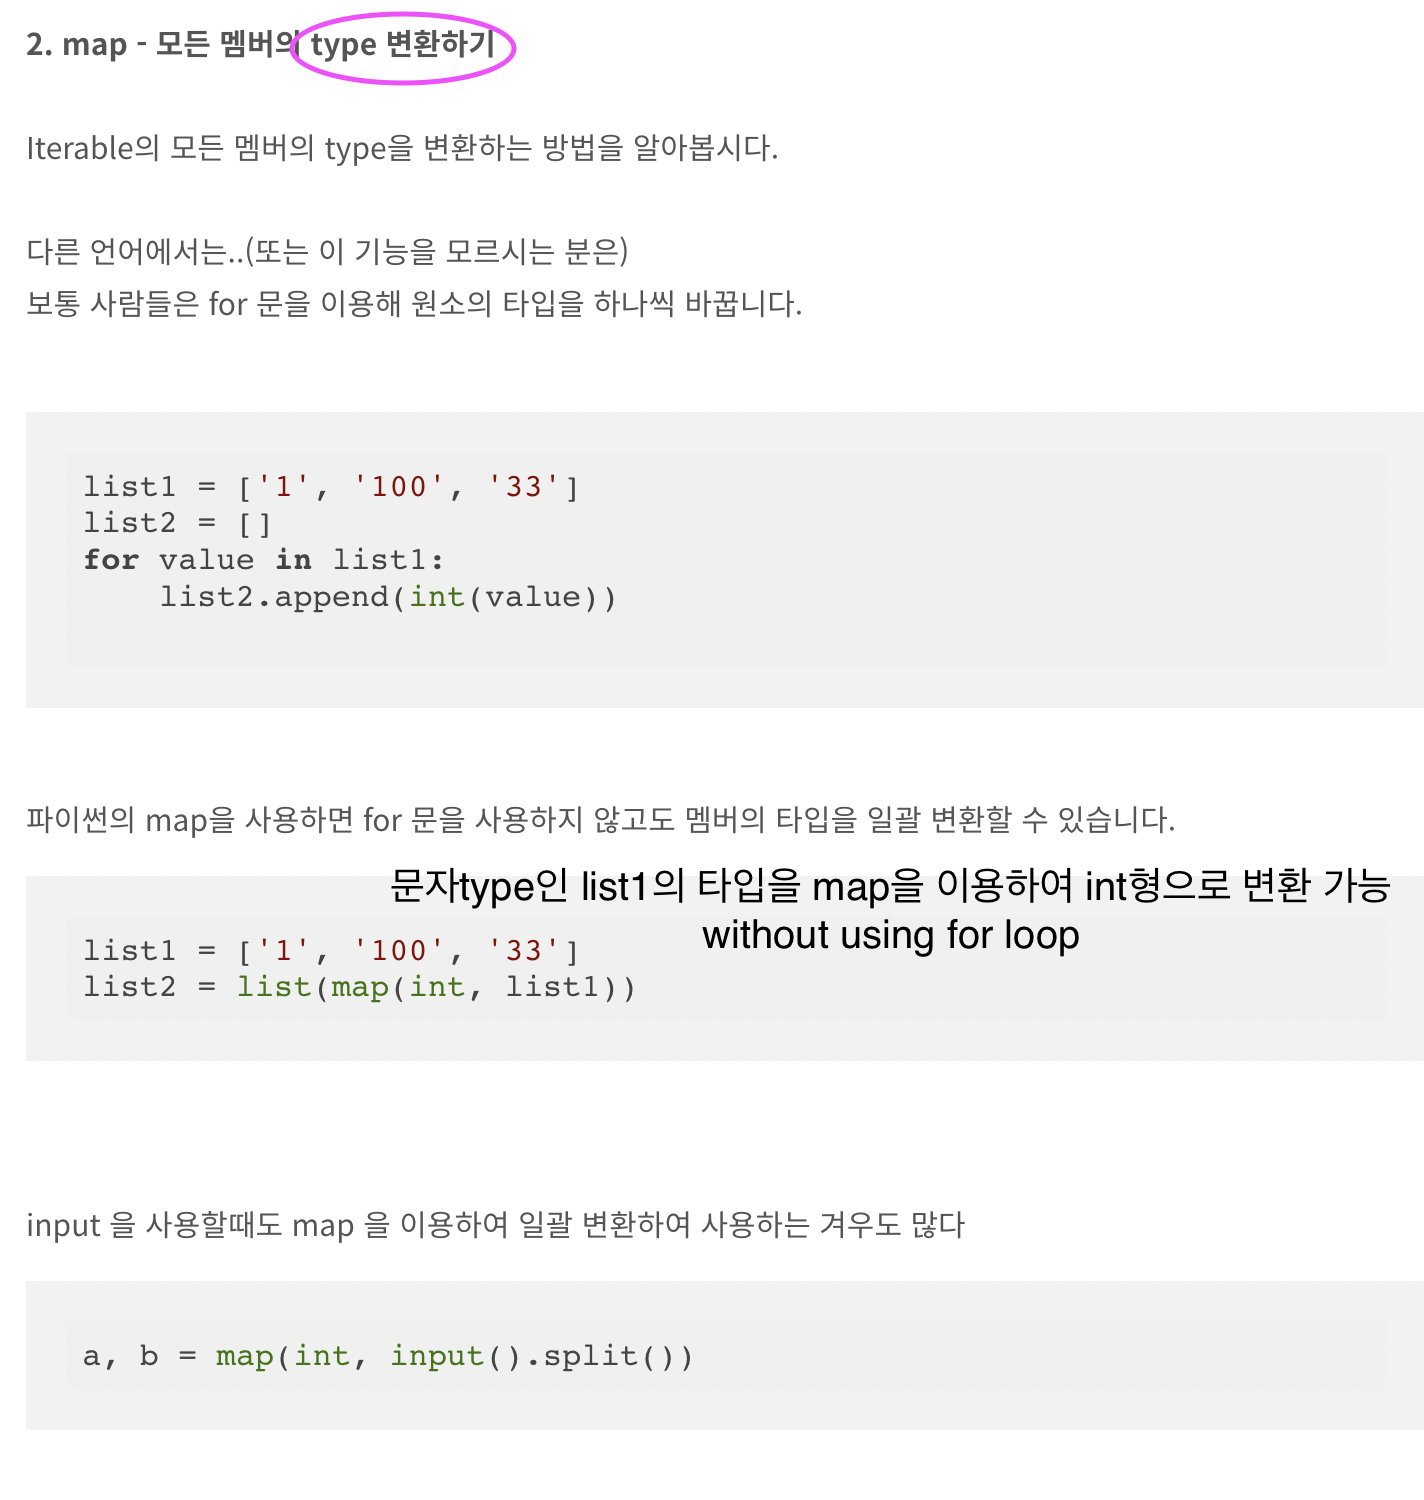

In [214]:
print("ABOUT ZIP")
mylist = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] 
new_list = list(map(list, zip(*mylist))) 
print(new_list)
print(*mylist)
print(*zip(*mylist))
print(*map(list, zip(*mylist)))

x = [10,20,30]
y = ["a","b","c"]

for i in zip(x,y):
	print(i)


ABOUT ZIP
[[1, 4, 7], [2, 5, 8], [3, 6, 9]]
[1, 2, 3] [4, 5, 6] [7, 8, 9]
(1, 4, 7) (2, 5, 8) (3, 6, 9)
[1, 4, 7] [2, 5, 8] [3, 6, 9]
(10, 'a')
(20, 'b')
(30, 'c')


In [215]:
print("ABOUT JOIN")
my_list = ['1', '100', '33']
answer = ''.join(my_list)
print(answer)


ABOUT JOIN
110033
